## Objective

To conduct a comprehensive analysis of the IPL 2024 season data using Python programming and data analytics techniques, with the aim of gaining insights into team performance, player dynamics, and match outcomes. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd 

In [2]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Powerful library for creating interactive and publication-quality visualizations.
import os
import plotly.graph_objects as go
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.io as pio
from plotly.subplots import make_subplots

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
from datetime import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import AnchoredText
import matplotlib
YELLOVE = '#fdb913'        

In [4]:
# Colour Guidance
from colorama import Fore, Back, Style

y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
c_ = Fore.CYAN
res = Style.RESET_ALL

## Data Collection 

In [5]:
all_details = pd.read_csv('all_season_details.csv')
all_bowling = pd.read_csv('all_season_bowling_card.csv')
all_batting = pd.read_csv('all_season_batting_card.csv')
all_summary = pd.read_csv('all_season_summary.csv')

details_24 = pd.read_csv('2024/season_details.csv')
bowling_24 = pd.read_csv('2024/season_bowling_card.csv')
batting_24 = pd.read_csv('2024/season_batting_card.csv')
summary_24 = pd.read_csv('2024/season_summary.csv')

## Read the data

In [6]:
# Defining head and tail for each DataFrame
print("Head and Tail of all_details DataFrame:")
print(all_details.head())
print(all_details.tail())

Head and Tail of all_details DataFrame:
   comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  ...  wicket_id wkt_batsman_name  \
0             CSK           1     1     1  ...        NaN              NaN   
1             CSK           1     1     2  ...        NaN              NaN   
2             CSK           1     1     3  ...        NaN              NaN   
3             CSK           1     1     4  ...        NaN              NaN   
4             CSK           1     1     5  ...        NaN              NaN   

   wkt_bowler_name  wkt_batsman_runs  wkt_batsman_balls  wkt_text  \
0              NaN       

In [7]:
print("\nHead and Tail of all_bowling DataFrame:")
print(all_bowling.head())
print(all_bowling.tail())


Head and Tail of all_bowling DataFrame:
   season  match_id match_name home_team away_team bowling_team  \
0  2023.0   1359475   GT v CSK        GT       CSK           GT   
1  2023.0   1359475   GT v CSK        GT       CSK           GT   
2  2023.0   1359475   GT v CSK        GT       CSK           GT   
3  2023.0   1359475   GT v CSK        GT       CSK           GT   
4  2023.0   1359475   GT v CSK        GT       CSK           GT   

                                      venue       city country  innings_id  \
0  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India           1   
1  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India           1   
2  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India           1   
3  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India           1   
4  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India           1   

   ... conceded wickets  economyRate  dots  foursConceded  sixesConceded  \
0  ...     

In [8]:
print("\nHead and Tail of all_batting DataFrame:")
print(all_batting.head())
print(all_batting.tail())


Head and Tail of all_batting DataFrame:
   season  match_id match_name home_team away_team  \
0  2023.0   1359475   GT v CSK        GT       CSK   
1  2023.0   1359475   GT v CSK        GT       CSK   
2  2023.0   1359475   GT v CSK        GT       CSK   
3  2023.0   1359475   GT v CSK        GT       CSK   
4  2023.0   1359475   GT v CSK        GT       CSK   

                                      venue       city country  \
0  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   
1  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   
2  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   
3  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   
4  Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   

  current_innings  innings_id  ... fours sixes  strikeRate  captain isNotOut  \
0             CSK           1  ...   0.0   0.0       16.66    False    False   
1             CSK           1  ...   4.0   9.0      184.00    False    False 

In [9]:
print("\nHead and Tail of all_summary DataFrame:")
print(all_summary.head())
print(all_summary.tail())


Head and Tail of all_summary DataFrame:
   season       id                                          name  short_name  \
0  2023.0  1359475          Gujarat Titans v Chennai Super Kings    GT v CSK   
1  2023.0  1359476          Punjab Kings v Kolkata Knight Riders  PBKS v KKR   
2  2023.0  1359477         Lucknow Super Giants v Delhi Capitals    LSG v DC   
3  2023.0  1359478        Sunrisers Hyderabad v Rajasthan Royals    SRH v RR   
4  2023.0  1359479  Royal Challengers Bangalore v Mumbai Indians    RCB v MI   

                                         description home_team away_team  \
0  1st Match (N), Indian Premier League at Ahmeda...        GT       CSK   
1  2nd Match (D/N), Indian Premier League at Chan...      PBKS       KKR   
2  3rd Match (N), Indian Premier League at Luckno...       LSG        DC   
3  4th Match (D/N), Indian Premier League at Hyde...       SRH        RR   
4  5th Match (N), Indian Premier League at Bengal...       RCB        MI   

  toss_won    decisio

In [10]:
print("\nHead and Tail of details_24 DataFrame:")
print(details_24.head())
print(details_24.tail())


Head and Tail of details_24 DataFrame:
   comment_id  season  match_id match_name home_team away_team  \
0         120  2024.0   1422119  CSK v RCB       CSK       RCB   
1         110  2024.0   1422119  CSK v RCB       CSK       RCB   
2         130  2024.0   1422119  CSK v RCB       CSK       RCB   
3         140  2024.0   1422119  CSK v RCB       CSK       RCB   
4         150  2024.0   1422119  CSK v RCB       CSK       RCB   

  current_innings  innings_id  over  ball  ...  wicket_id wkt_batsman_name  \
0             RCB           1     1     1  ...        NaN              NaN   
1             RCB           1     1     1  ...        NaN              NaN   
2             RCB           1     1     2  ...        NaN              NaN   
3             RCB           1     1     3  ...        NaN              NaN   
4             RCB           1     1     4  ...        NaN              NaN   

   wkt_bowler_name  wkt_batsman_runs  wkt_batsman_balls  wkt_text  \
0              NaN       

In [11]:
print("\nHead and Tail of bowling_24 DataFrame:")
print(bowling_24.head())
print(bowling_24.tail())


Head and Tail of bowling_24 DataFrame:
   season  match_id match_name home_team away_team bowling_team  \
0  2024.0   1422119  CSK v RCB       CSK       RCB          CSK   
1  2024.0   1422119  CSK v RCB       CSK       RCB          CSK   
2  2024.0   1422119  CSK v RCB       CSK       RCB          CSK   
3  2024.0   1422119  CSK v RCB       CSK       RCB          CSK   
4  2024.0   1422119  CSK v RCB       CSK       RCB          CSK   

                                      venue     city country  innings_id  ...  \
0  MA Chidambaram Stadium, Chepauk, Chennai  Chennai   India           1  ...   
1  MA Chidambaram Stadium, Chepauk, Chennai  Chennai   India           1  ...   
2  MA Chidambaram Stadium, Chepauk, Chennai  Chennai   India           1  ...   
3  MA Chidambaram Stadium, Chepauk, Chennai  Chennai   India           1  ...   
4  MA Chidambaram Stadium, Chepauk, Chennai  Chennai   India           1  ...   

  conceded wickets  economyRate  dots  foursConceded  sixesConceded  w

In [12]:
print("\nHead and Tail of batting_24 DataFrame:")
print(batting_24.head())
print(batting_24.tail())


Head and Tail of batting_24 DataFrame:
   season  match_id match_name home_team away_team  \
0  2024.0   1422119  CSK v RCB       CSK       RCB   
1  2024.0   1422119  CSK v RCB       CSK       RCB   
2  2024.0   1422119  CSK v RCB       CSK       RCB   
3  2024.0   1422119  CSK v RCB       CSK       RCB   
4  2024.0   1422119  CSK v RCB       CSK       RCB   

                                      venue     city country current_innings  \
0  MA Chidambaram Stadium, Chepauk, Chennai  Chennai   India             RCB   
1  MA Chidambaram Stadium, Chepauk, Chennai  Chennai   India             RCB   
2  MA Chidambaram Stadium, Chepauk, Chennai  Chennai   India             RCB   
3  MA Chidambaram Stadium, Chepauk, Chennai  Chennai   India             RCB   
4  MA Chidambaram Stadium, Chepauk, Chennai  Chennai   India             RCB   

   innings_id  ... fours sixes  strikeRate  captain isNotOut  \
0           1  ...     0     1      105.00    False    False   
1           1  ...     8  

In [13]:
print("\nHead and Tail of summary_24 DataFrame:")
print(summary_24.head())
print(summary_24.tail())


Head and Tail of summary_24 DataFrame:
   season       id                                               name  \
0  2024.0  1422119  Chennai Super Kings v Royal Challengers Bengaluru   
1  2024.0  1422120                      Punjab Kings v Delhi Capitals   
2  2024.0  1422121        Kolkata Knight Riders v Sunrisers Hyderabad   
3  2024.0  1422122            Rajasthan Royals v Lucknow Super Giants   
4  2024.0  1422123                    Gujarat Titans v Mumbai Indians   

  short_name                                        description home_team  \
0  CSK v RCB  1st Match (N), Indian Premier League at Chenna...       CSK   
1  PBKS v DC  2nd Match (D/N), Indian Premier League at Moha...      PBKS   
2  KKR v SRH  3rd Match (N), Indian Premier League at Kolkat...       KKR   
3   RR v LSG  4th Match (D/N), Indian Premier League at Jaip...        RR   
4    GT v MI  5th Match (N), Indian Premier League at Ahmeda...        GT   

  away_team toss_won    decision 1st_inning_score  ...  \


In [14]:
print("Any Null values in all_details DataFrame:")
print(all_details.isnull(). sum())

Any Null values in all_details DataFrame:
comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler

In [15]:
print("Any null values in all_bowling DataFrame:")
print(all_bowling.isnull(). sum())

Any null values in all_bowling DataFrame:
season           31
match_id          0
match_name        0
home_team         0
away_team         0
bowling_team      0
venue             0
city              0
country           0
innings_id        0
name              0
fullName          0
overs             0
maidens           0
conceded          0
wickets           0
economyRate       0
dots              0
foursConceded     0
sixesConceded     0
wides             0
noballs           0
captain           0
href              0
dtype: int64


In [16]:
print("Any Null Values in details_24 DataFrame:")
print(details_24.isnull(). sum())

Any Null Values in details_24 DataFrame:
comment_id              0
season                  0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            290
bowler2_name          290
bowler2_overs         290
bowler2_maidens       290
bowler2_runs          290
bowler2_wkts          290
wicket_id            5325
wkt_batsman_name     53

In [17]:
print("Any Null Values in bowling_24 DataFrame:")
print(bowling_24.isnull(). sum())

Any Null Values in bowling_24 DataFrame:
season           0
match_id         0
match_name       0
home_team        0
away_team        0
bowling_team     0
venue            0
city             0
country          0
innings_id       0
name             0
fullName         0
overs            0
maidens          0
conceded         0
wickets          0
economyRate      0
dots             0
foursConceded    0
sixesConceded    0
wides            0
noballs          0
captain          0
href             0
dtype: int64


In [18]:
print("Any Null Values in all_batting DataFrame:")
print(all_batting.isnull(). sum())

Any Null Values in all_batting DataFrame:
season                36
match_id               0
match_name             0
home_team              0
away_team              0
venue                  0
city                   0
country                0
current_innings        0
innings_id             0
name                   0
fullName               0
runs                   6
ballsFaced             6
minutes                6
fours                  6
sixes                  6
strikeRate             6
captain                0
isNotOut               6
runningScore           6
runningOver         3691
shortText              0
commentary          3694
link               15720
dtype: int64


## EDA

# IPL 2024 Season Stats

### BATTING STATS

In [19]:
city_map = {'Arun Jaitley Stadium, Delhi' : 'Delhi',
'Eden Gardens, Kolkata' : 'Kolkata',
'M. Chinnaswamy Stadium, Bengaluru' : 'Bengaluru',
'MA Chidambaram Stadium, Chepauk, Chennai' : 'Chennai',
'Narendra Modi Stadium, Ahmedabad' : 'Ahmedabad', 
'Wankhede Stadium, Mumbai' : 'Mumbai'}

home_team_map = {'Arun Jaitley Stadium, Delhi' : 'DC',
'Eden Gardens, Kolkata' : 'KKR',
'M. Chinnaswamy Stadium, Bengaluru' : 'RCB',
'MA Chidambaram Stadium, Chepauk, Chennai' : 'CSK',
'Wankhede Stadium, Mumbai' : 'MI'}

team_colors = {'MI' : '#0722ab',#'#031026',
'CSK' : '#fdb913',
'DC' : '#2561AE',
'SRH' : '#fb653f',
'KKR' : '#391F5C',
'KIXP': '#b32524',
'PBKS' : '#dd1212',
'RR' : '#FF4081',
'RCB': '#98FB98',   # Parakeet green 
'GT' : '#004587',
'LSG' : '#02ccbf'
}


venue_colors = {'Mumbai' : '#0722ab',
'Chennai' : '#fdb913',
'Delhi' : '#004c93',
'Kolkata' : '#3d2256',
'Ahmedabad' : '#545252',
'Bengaluru' : '#ef4022'}
pd.set_option('display.max_columns', None)

def plot_batting_chart(title, column, label):
    runs = batting_24.groupby(['fullName','current_innings'])[column].sum().sort_values(ascending=False).reset_index().head(10)
    fig = px.bar(runs, x='fullName', y=column,
             hover_data=['fullName', column], color='current_innings',
             labels={column: label},
             color_discrete_map=team_colors,
             text=column)
    fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': runs['fullName'],'title' : 'Batsman', 'showgrid':False},
                      yaxis={'showgrid':False},
                     title = title)
    fig.show()

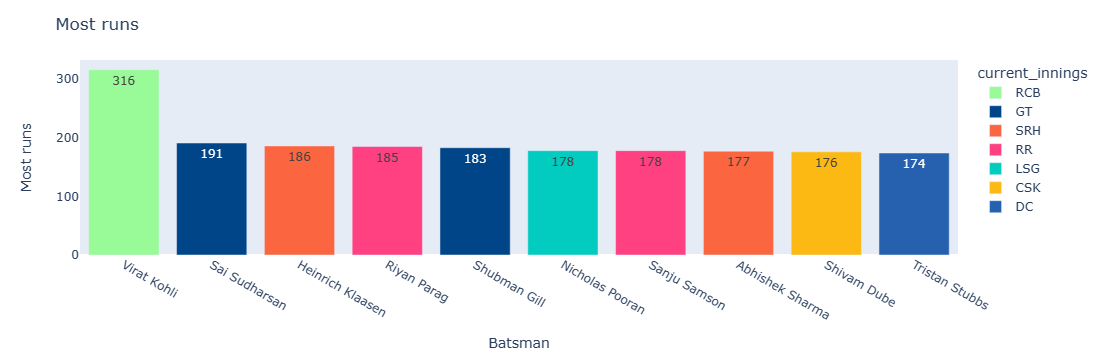

In [20]:
plot_batting_chart('Most runs', 'runs', 'Most runs')

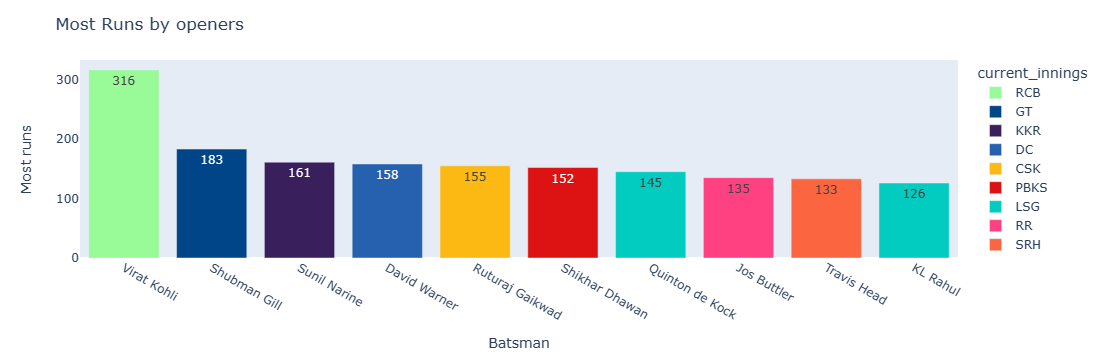

In [21]:
def plot_batting_chart_by_pos(pos, title):
    batpos_df = batting_24.groupby(['match_name','innings_id','current_innings']).nth(pos).reset_index()
    runs = batpos_df.groupby(['fullName','current_innings'])['runs'].sum().reset_index().sort_values(by='runs',ascending=False).reset_index(drop=True).head(10)
    fig = px.bar(runs, x='fullName', y='runs',
             hover_data=['fullName', 'runs'], color='current_innings',
             labels={'runs': 'Most runs'},
             color_discrete_map=team_colors,
             text='runs')
    fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': runs['fullName'],'title' : 'Batsman', 'showgrid':False},
                      yaxis={'showgrid':False},
                     title = title)
    fig.show()
    
openers_df = batting_24.groupby(['match_name','innings_id','current_innings']).head(2).reset_index(drop=True)

#batting_22
#plot_batting_chart('Most runs', 'runs', 'Most runs')
runs = openers_df.groupby(['fullName','current_innings'])['runs'].sum().reset_index().sort_values(by='runs',ascending=False).reset_index(drop=True).head(10)
fig = px.bar(runs, x='fullName', y='runs',
             hover_data=['fullName', 'runs'], color='current_innings',
             labels={'runs': 'Most runs'},
             color_discrete_map=team_colors,
             text='runs')
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': runs['fullName'],'title' : 'Batsman', 'showgrid':False},
                      yaxis={'showgrid':False},
                     title = 'Most Runs by openers')
fig.show()

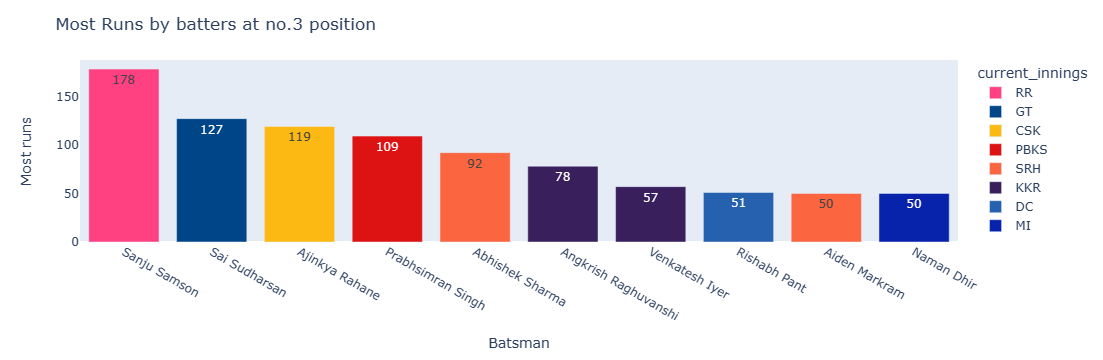

In [22]:
plot_batting_chart_by_pos(2,'Most Runs by batters at no.3 position')

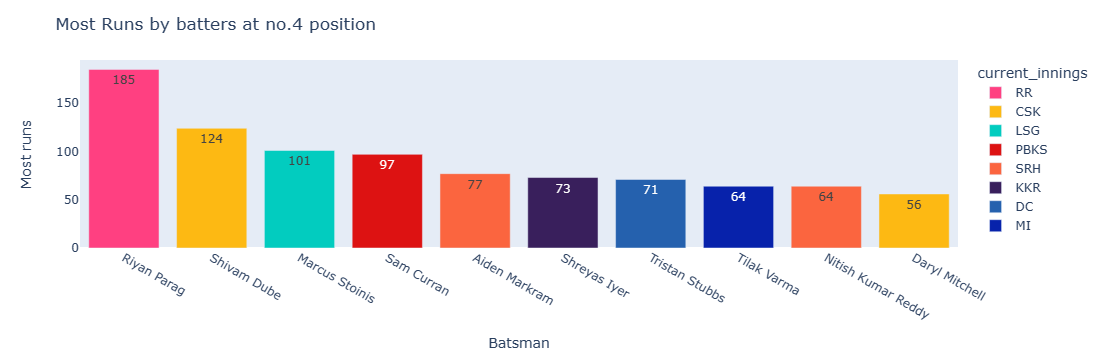

In [23]:
plot_batting_chart_by_pos(3,'Most Runs by batters at no.4 position')

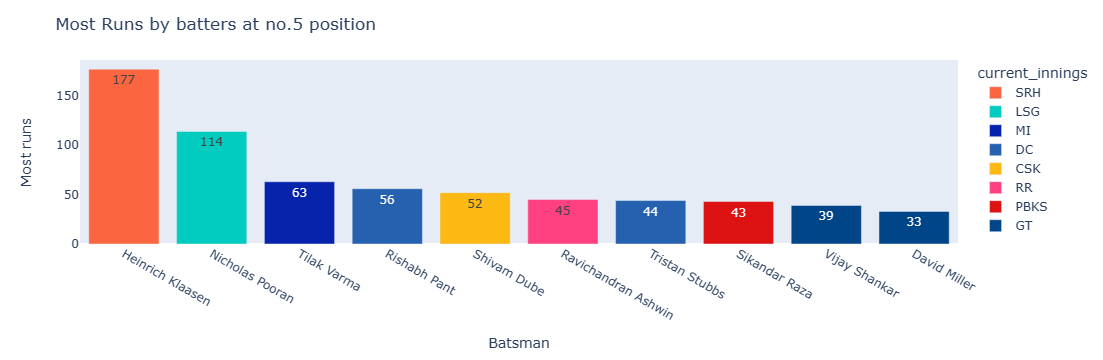

In [24]:
plot_batting_chart_by_pos(4,'Most Runs by batters at no.5 position')

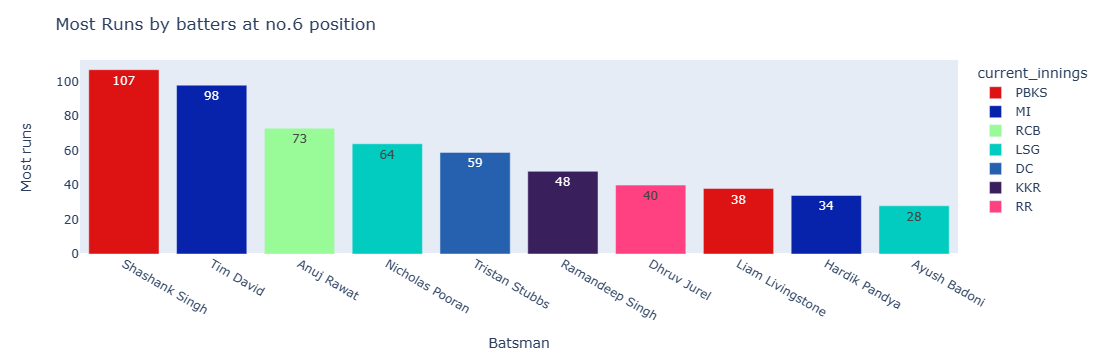

In [25]:
plot_batting_chart_by_pos(5,'Most Runs by batters at no.6 position')

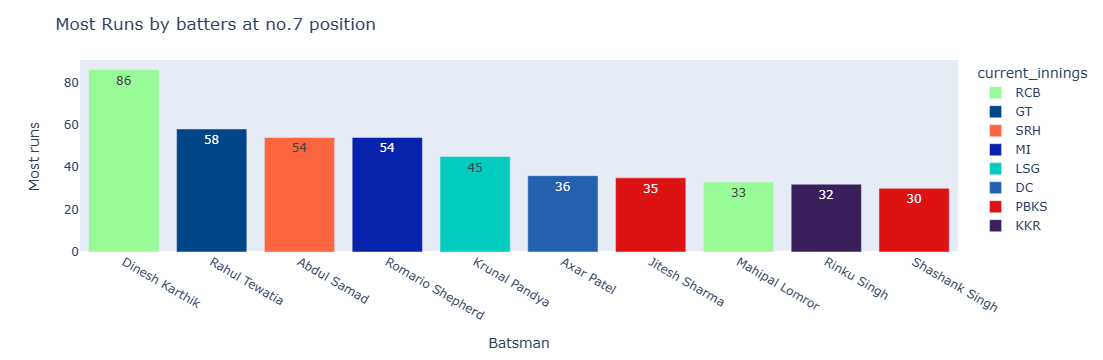

In [26]:
plot_batting_chart_by_pos(6,'Most Runs by batters at no.7 position')

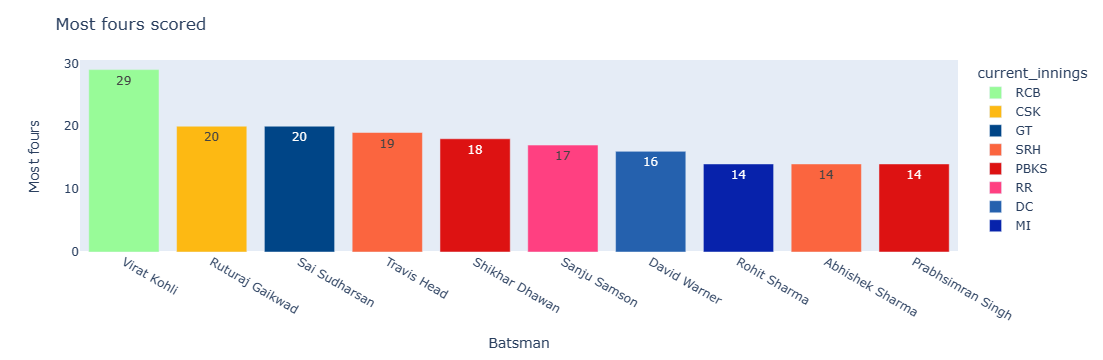

In [27]:
plot_batting_chart('Most fours scored', 'fours', 'Most fours')

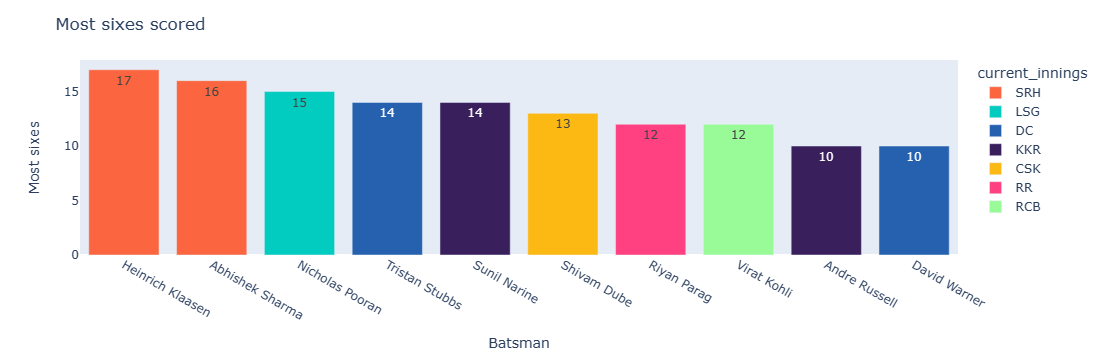

In [28]:
plot_batting_chart('Most sixes scored', 'sixes', 'Most sixes')

In [29]:
detail_df = details_24.loc[(details_24['isWide'] == False) | (details_24['isNoball'] == False)]
detail_df = detail_df.groupby(['batsman1_name','current_innings','runs'])['runs'].agg(['count']).reset_index()

def plot_runs_chart(title, runs, label):
    runs_df = detail_df.loc[detail_df['runs'] == runs]
    runs_df = runs_df.sort_values(by='count',ascending=False).reset_index(drop=True).head(10)
    fig = px.bar(runs_df, x='batsman1_name', y='count',
             hover_data=['batsman1_name', 'count'], color='current_innings',
             #labels={column: label},
             color_discrete_map=team_colors,
             text='count')
    fig.update_layout(xaxis={'categoryorder':'array','categoryarray': runs_df['batsman1_name'], 'showgrid':False, 'title':None},
                      yaxis={'showgrid':False},
                     title = title, )
    fig.show()

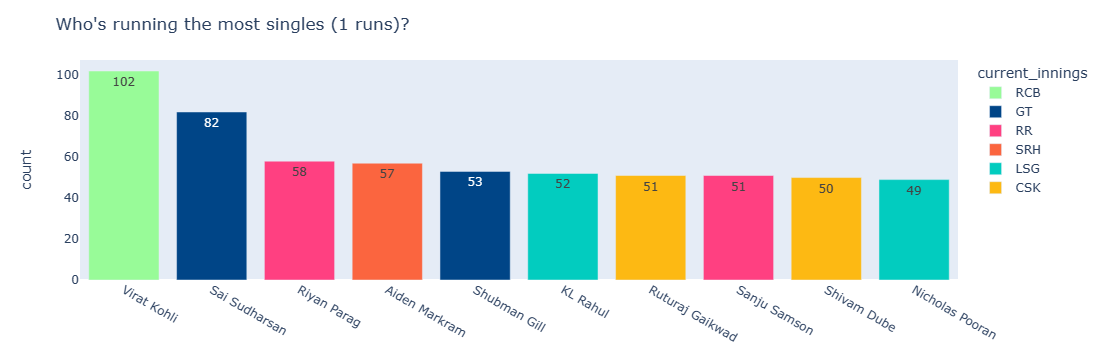

In [30]:
plot_runs_chart('Who\'s running the most singles (1 runs)?', 1, 'current_innings')

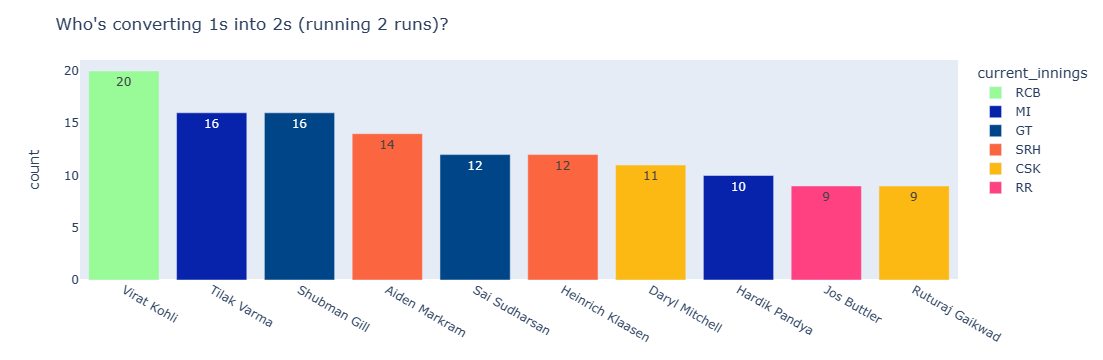

In [31]:
plot_runs_chart('Who\'s converting 1s into 2s (running 2 runs)?', 2, 'current_innings')

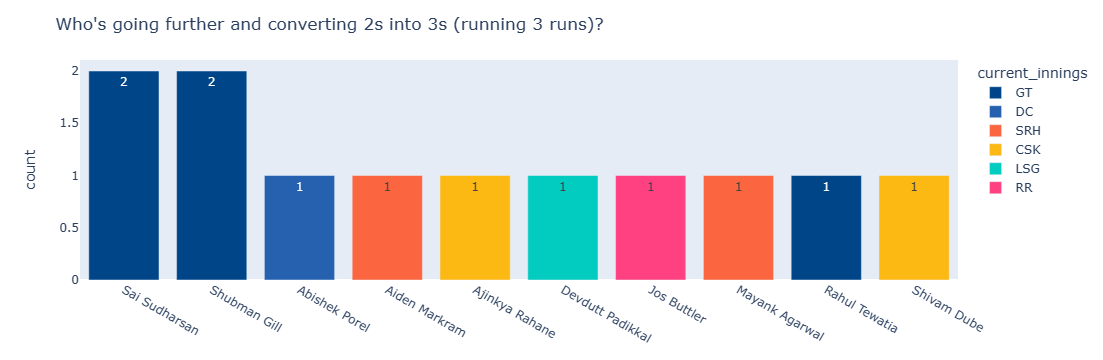

In [32]:
plot_runs_chart('Who\'s going further and converting 2s into 3s (running 3 runs)?', 3, 'current_innings')

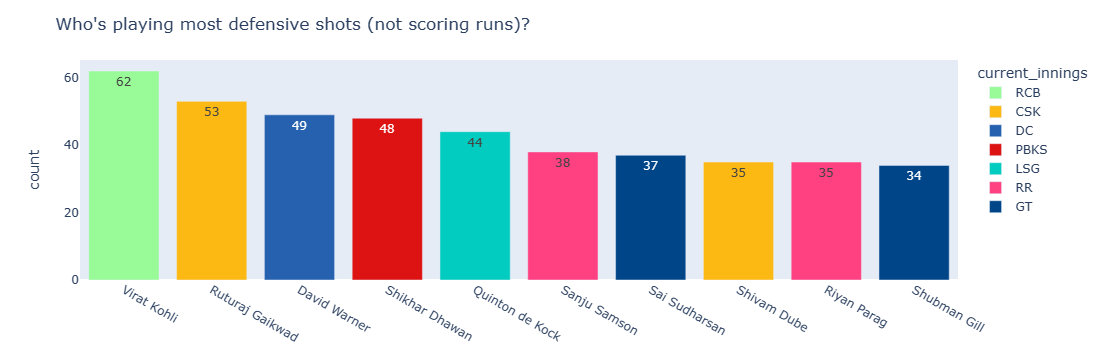

In [33]:
plot_runs_chart('Who\'s playing most defensive shots (not scoring runs)?', 0, 'current_innings')

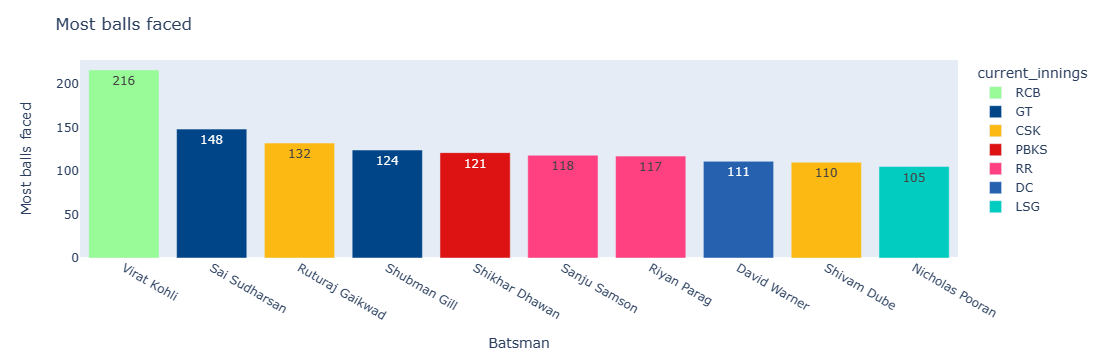

In [34]:
plot_batting_chart('Most balls faced', 'ballsFaced', 'Most balls faced')

### Strike Rate

In [35]:
def plot_batting_avg_chart(title, column, label):
    runs = batting_24.groupby(['fullName','current_innings'])[column].mean().sort_values(ascending=False).reset_index().round(2).head(10)
    fig = px.bar(runs, x='fullName', y=column,
             hover_data=['fullName', column], color='current_innings',
             labels={column: label},
             color_discrete_map=team_colors,
             text=column)
    fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': runs['fullName'],'title' : 'Batsman', 'showgrid':False},
                      yaxis={'showgrid':False},
                     title = title)
    fig.show()
batting_24['strikeRate'] = batting_24['strikeRate'].replace('-','0')
batting_24['strikeRate'] = batting_24['strikeRate'].astype(float)

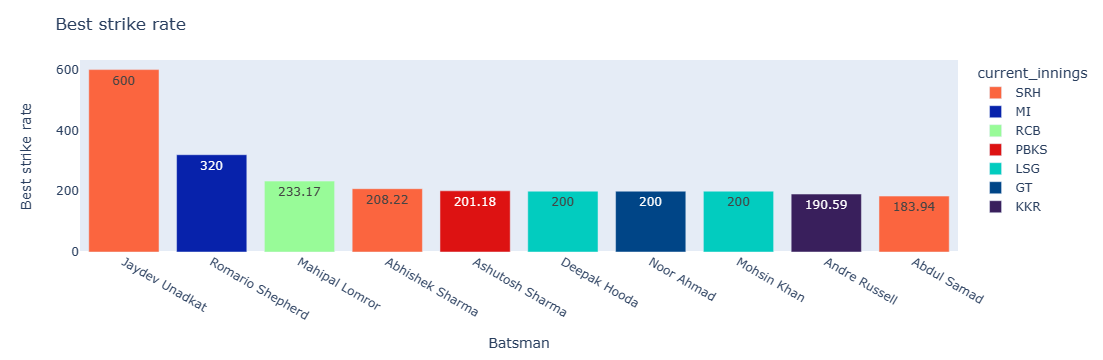

In [36]:
plot_batting_avg_chart('Best strike rate', 'strikeRate','Best strike rate') 

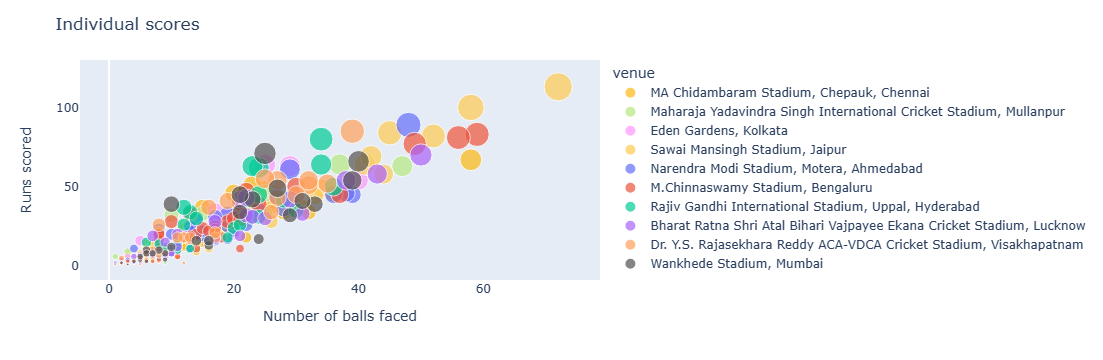

In [37]:
ground_colors = {
    'Brabourne Stadium, Mumbai' : '#0722ab', 
    'Dr DY Patil Sports Academy, Mumbai' : '#ef4022 ',
    'Dr DY Patil Sports Academy, Navi Mumbai' : '#ef4022 ',
    'Maharashtra Cricket Association Stadium, Pune' : '#004c93',
    'Arun Jaitley Stadium, Delhi' : '#004c93',
    'MA Chidambaram Stadium, Chepauk, Chennai' : '#fdb913',
    'Wankhede Stadium, Mumbai' : '#545252' 
}


venue_colors = {
    'Brabourne' : '#0722ab',
    'DY Patil' : '#fdb913',
    'Pune' : '#004c93',
    'Wankhede' : '#3d2256',
    'Ahmedabad' : '#545252',
    'Bengaluru' : '#ef4022'
}

fig = px.scatter(batting_24, x="ballsFaced", y="runs", color='venue',size='runs',hover_data=['fullName'],
                color_discrete_map=ground_colors
                )
fig.update_layout(xaxis=dict(title='Number of balls faced',showgrid=False),yaxis=dict(title='Runs scored',showgrid=False,zeroline=False), 
                  title = 'Individual scores',
                 )    
fig.show()

In [38]:
#Data For Polar Charts
runs = batting_24.groupby(['fullName','current_innings'])['runs'].sum().sort_values(ascending=False).reset_index().head(6)
batsmans_top5 = list(runs.fullName)

batting_24 = batting_24.loc[~(batting_24['strikeRate'] == '-')].reset_index(drop=True)
batting_24['strikeRate'] = batting_24['strikeRate'].astype(float)

def get_batting_aggregate_sum(batsman_name, column):
    all_runs = batting_24.groupby(['fullName'])[column].sum().reset_index()
    val = all_runs.loc[all_runs['fullName'] == batsman_name].reset_index(drop=True).iloc[0][column]
    return val

def get_batting_aggregate_mean(batsman_name, column):
    all_runs = batting_24.groupby(['fullName'])[column].mean().reset_index()
    val = all_runs.loc[all_runs['fullName'] == batsman_name].reset_index(drop=True).iloc[0][column]
    return round(val,2)

def get_num_innings(batsman_name):
    return batting_24.loc[batting_24['fullName'] == batsman_name].shape[0]

def get_num_fifties(batsman_name, min_runs=50):
    return batting_24.loc[(batting_24['fullName'] == batsman_name) & (batting_24['runs'] >= min_runs)].shape[0]

def get_highest(batsman_name):
    return max(batting_24.loc[(batting_24['fullName'] == batsman_name)]['runs'])

batsman_attributes = ['runs','ballsFaced','fours', 'sixes'] #'strikeRate']

       

In [39]:
#print(batsmans_top5)
batsman_polar_data = {}
for batsman in batsmans_top5:
    data = {}
    data['innings'] = get_num_innings(batsman)
    for attr in batsman_attributes:
        data[attr] = get_batting_aggregate_sum(batsman, attr)
    data['50s'] = get_num_fifties(batsman)
    data['Highest'] = get_highest(batsman)    
    data['strikeRate'] = get_batting_aggregate_mean(batsman, 'strikeRate')
    batsman_polar_data[batsman] = data

plt.rcParams['figure.dpi'] = 200

def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    ## Check the data if there are errors by uncommenting this
    #print(data, ranges) 
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=4):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_position((-0.1,-0.1)) for txt, angle 
            #txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
            ax.set_yticks([])
            #print(ax.get_ylabel())

 # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
        self.ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        #for p, r, val, var in zip(self.angle, sdata, data, variables):
        #    if var in ['innings', 'runs', 'ballsFaced', 'sixes', 'fours', '50s', 'Highest']:
        #        val = int(val)
        #    self.ax.annotate(val, xy=(p, r+2))       
        
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

def draw_polar_chart(player_dict, ranges=[(5,17),(100,700),(100,700),(10,100),(5,60),(1,10),(30, 140),(90.0,150.0)]):
    variables = ('Innings', 'Runs', 'Balls Faced', 'Fours','Sixes', '50s', 'Highest', 'Strike Rate')
    fig1 = plt.figure(figsize=(4, 3))
    radar = ComplexRadar(fig1, variables, ranges)

    for batsman in player_dict:
        name = batsman['batsman']
        color = batsman['color']

        data = tuple(i for i in list(batsman_polar_data[name].values()))

# plotting
        radar.plot(data,color=color, markeredgecolor=color,label=name)
        radar.fill(data, alpha=0.2, facecolor=color)

    plt.figtext(1.95, 0.10, 'Polar chart comparison of top 5 batsmen of 2024', horizontalalignment='right', size=10, weight='light',family='serif')    
    plt.show()
            

### Import Random

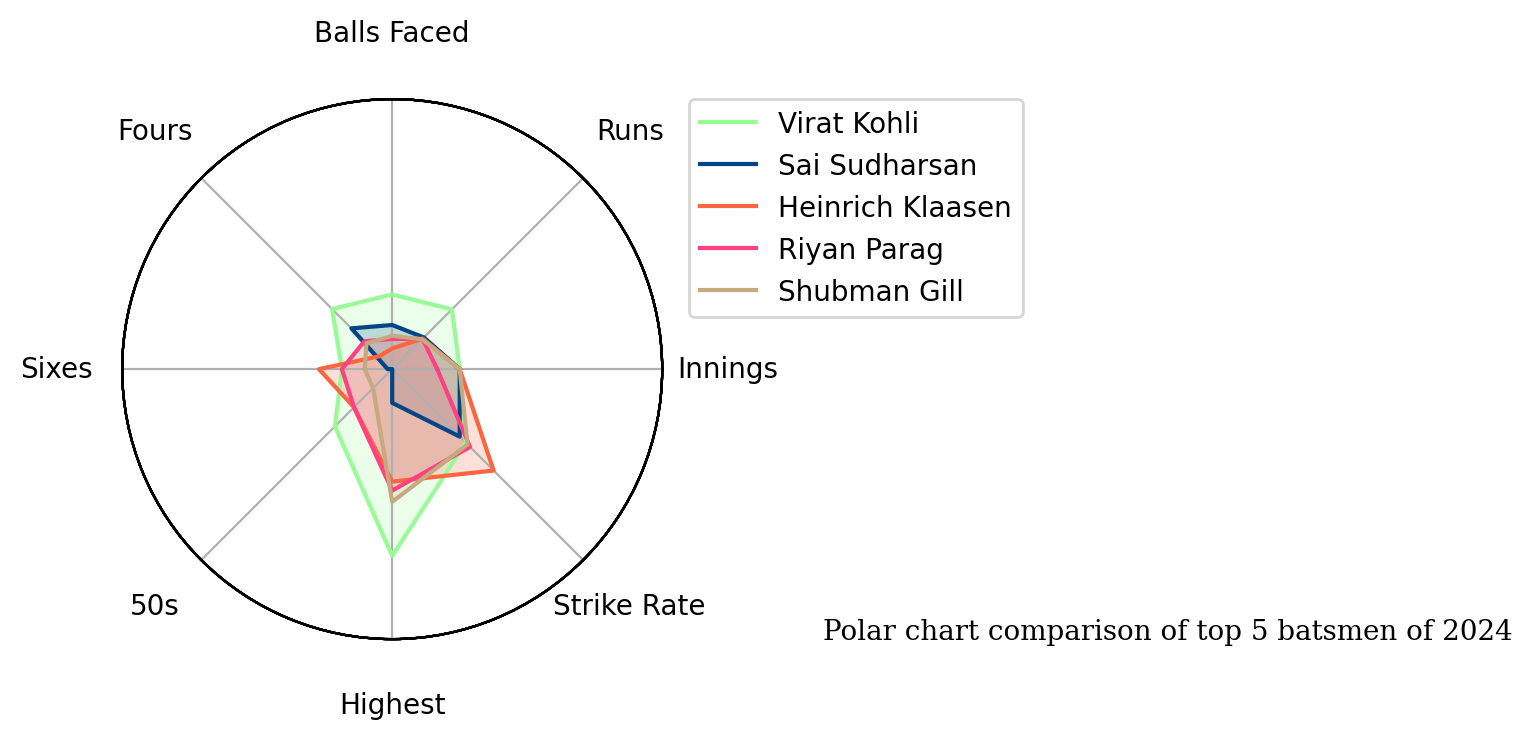

In [40]:
import random
runs = batting_24.groupby(['fullName','current_innings'])['runs'].sum().sort_values(ascending=False).reset_index().head(5)
polar_keys = []
color_list = ['#7C887E','#91967F', '#BAB79F', '#D3D2CD','#A08D83', '#726870', '#C5AA7F','#5A5542']  
player_teams = []
for batsman, team in zip(runs.fullName,runs.current_innings):
    player = {}
    player['batsman'] = batsman    
    if team not in player_teams:
        player['color'] = team_colors[team]
        player_teams.append(team)
    else:
        player['color'] = random.choice(color_list)
    polar_keys.append(player)    
draw_polar_chart(polar_keys, ranges=[(2,14),(50,900),(50,650),(1,90),(1,60),(0,10),(30, 150),(70.0,250.0)])

### BOWLING STATS

In [41]:
def plot_bowling_chart(title, column, label):
    wickets = bowling_24.groupby(['fullName','bowling_team'])[column].sum().sort_values(ascending=False).reset_index().head(10)
    fig = px.bar(wickets, x='fullName', y=column,
             hover_data=['fullName', column], color='bowling_team',
             labels={column: label},
             color_discrete_map=team_colors,
             text=column)
    fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': wickets['fullName'],'title' : 'Bowler','showgrid':False},
                      yaxis={'showgrid':False},
                     title = title)
    fig.show()

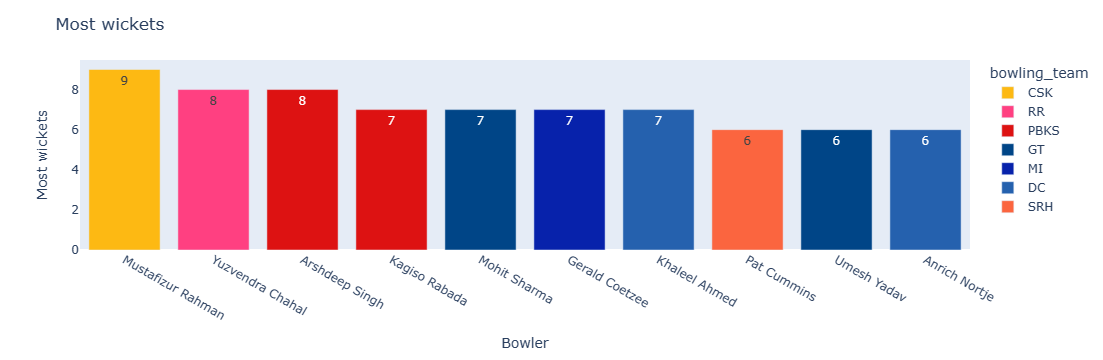

In [42]:
plot_bowling_chart('Most wickets','wickets','Most wickets')

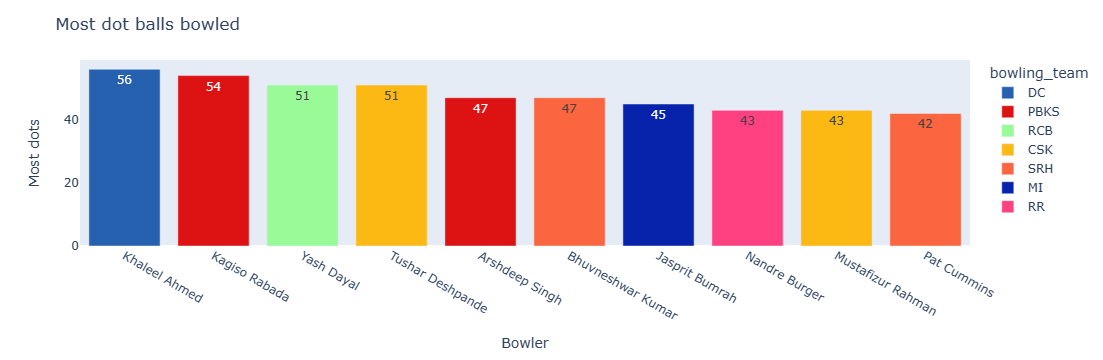

In [43]:
plot_bowling_chart('Most dot balls bowled','dots','Most dots')

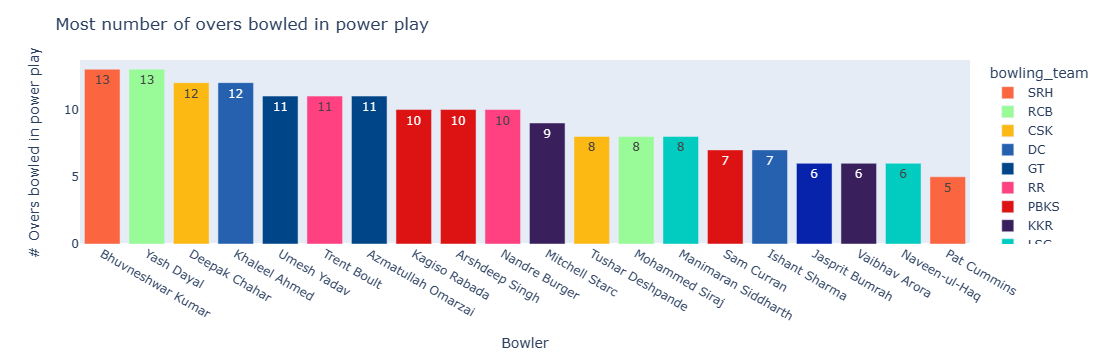

In [44]:
pp_overs = details_24.loc[details_24['over'].isin([1,2,3,4,5,6])]
pp_overs = pp_overs[['match_name','current_innings','over','bowler1_name']]
pp_overs.drop_duplicates(keep='first', inplace=True, ignore_index=False)

def get_bowling_team(row):
    team1 = row['match_name'].split('v')[0].strip()
    team2 = row['match_name'].split('v')[1].strip()  
    #print(team1, team2)
    if str(row['current_innings']) == team1:
        return team2
    else:
        return team1
pp_overs['bowling_team'] = pp_overs.apply(lambda row: get_bowling_team(row), axis=1)
#pp_overs.groupby(['bowling_team','bowler1_name'])['over'].count().reset_index().sort_values(by='over',ascending=False).reset_index(drop=True)

pp = pp_overs.groupby(['bowling_team','bowler1_name'])['over'].count().reset_index().sort_values(by='over',ascending=False).reset_index(drop=True).head(20)
fig = px.bar(pp, x='bowler1_name', y='over',
             hover_data=['bowler1_name', 'over'], color='bowling_team',
             labels={'over': '# Overs bowled in power play'},
             color_discrete_map=team_colors,
             text='over')
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': pp['bowler1_name'],'title' : 'Bowler','showgrid':False},
                      yaxis={'showgrid':False},
                     title = 'Most number of overs bowled in power play')
fig.show()

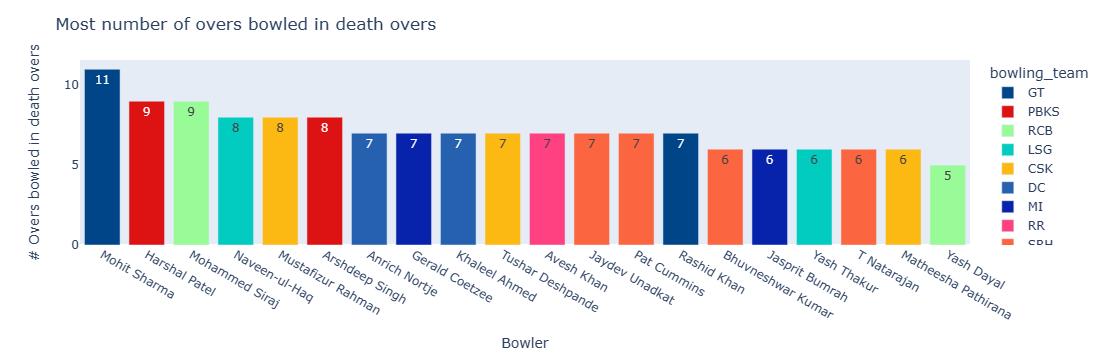

In [45]:
pp_overs = details_24.loc[details_24['over'].isin([15,16,17,18,19,20])]
pp_overs = pp_overs[['match_name','current_innings','over','bowler1_name']]
pp_overs.drop_duplicates(keep='first', inplace=True, ignore_index=False)

def get_bowling_team(row):
    team1 = row['match_name'].split('v')[0].strip()
    team2 = row['match_name'].split('v')[1].strip()  
    #print(team1, team2)
    if str(row['current_innings']) == team1:
        return team2
    else:
        return team1
pp_overs['bowling_team'] = pp_overs.apply(lambda row: get_bowling_team(row), axis=1)
#pp_overs.groupby(['bowling_team','bowler1_name'])['over'].count().reset_index().sort_values(by='over',ascending=False).reset_index(drop=True)

pp = pp_overs.groupby(['bowling_team','bowler1_name'])['over'].count().reset_index().sort_values(by='over',ascending=False).reset_index(drop=True).head(20)
fig = px.bar(pp, x='bowler1_name', y='over',
             hover_data=['bowler1_name', 'over'], color='bowling_team',
             labels={'over': '# Overs bowled in death overs'},
             color_discrete_map=team_colors,
             text='over')
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': pp['bowler1_name'],'title' : 'Bowler','showgrid':False},
                      yaxis={'showgrid':False},
                     title = 'Most number of overs bowled in death overs')
fig.show()

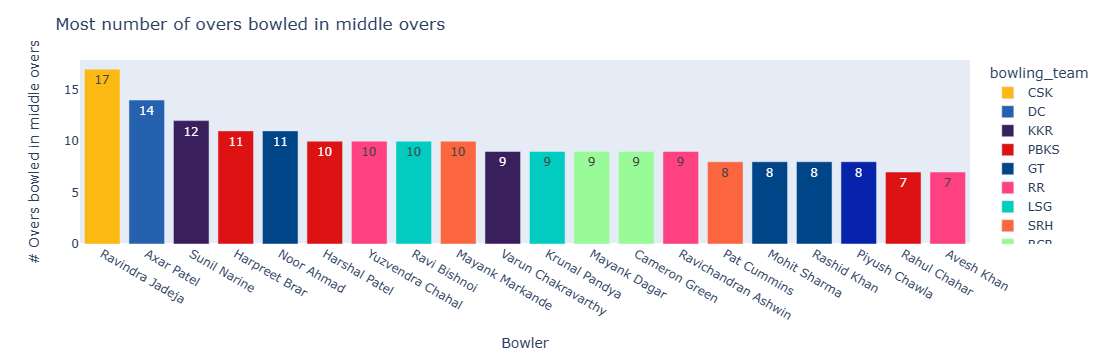

In [46]:
pp_overs = details_24.loc[details_24['over'].isin([7,8,9,10,11,12,13,14])]
pp_overs = pp_overs[['match_name','current_innings','over','bowler1_name']]
pp_overs.drop_duplicates(keep='first', inplace=True, ignore_index=False)

def get_bowling_team(row):
    team1 = row['match_name'].split('v')[0].strip()
    team2 = row['match_name'].split('v')[1].strip()  
    #print(team1, team2)
    if str(row['current_innings']) == team1:
        return team2
    else:
        return team1
pp_overs['bowling_team'] = pp_overs.apply(lambda row: get_bowling_team(row), axis=1)
#pp_overs.groupby(['bowling_team','bowler1_name'])['over'].count().reset_index().sort_values(by='over',ascending=False).reset_index(drop=True)

pp = pp_overs.groupby(['bowling_team','bowler1_name'])['over'].count().reset_index().sort_values(by='over',ascending=False).reset_index(drop=True).head(20)
fig = px.bar(pp, x='bowler1_name', y='over',
             hover_data=['bowler1_name', 'over'], color='bowling_team',
             labels={'over': '# Overs bowled in middle overs'},
             color_discrete_map=team_colors,
             text='over')
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': pp['bowler1_name'],'title' : 'Bowler','showgrid':False},
                      yaxis={'showgrid':False},
                     title = 'Most number of overs bowled in middle overs')
fig.show()

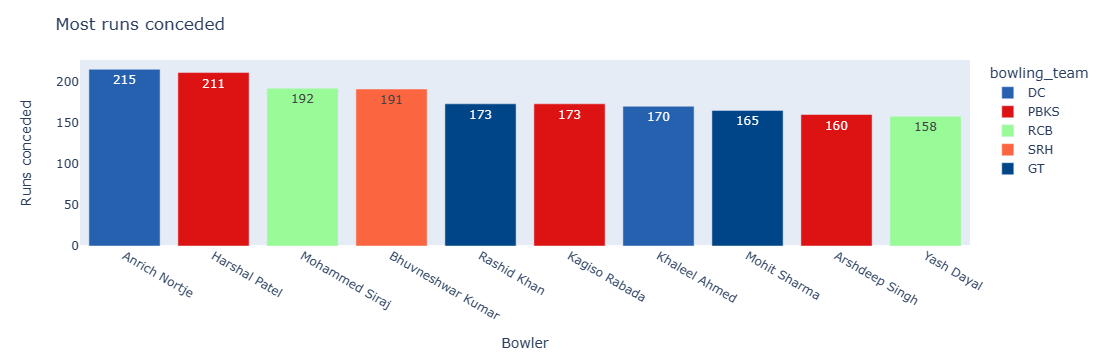

In [47]:
plot_bowling_chart('Most runs conceded','conceded','Runs conceded')

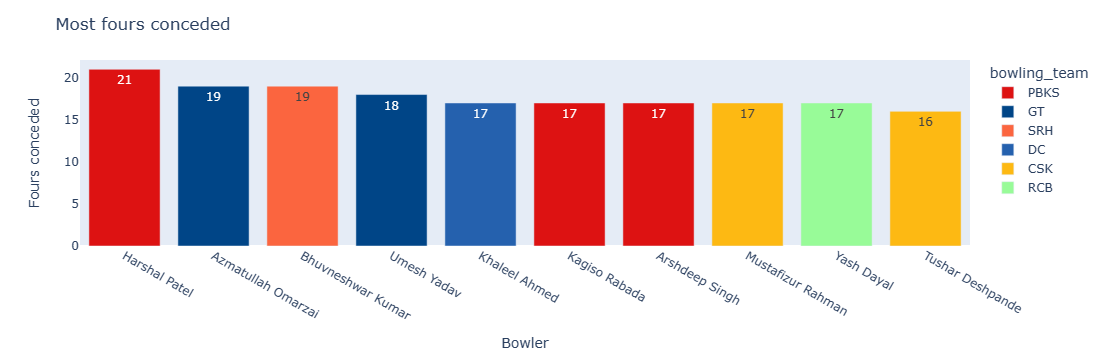

In [48]:
plot_bowling_chart('Most fours conceded','foursConceded','Fours conceded')

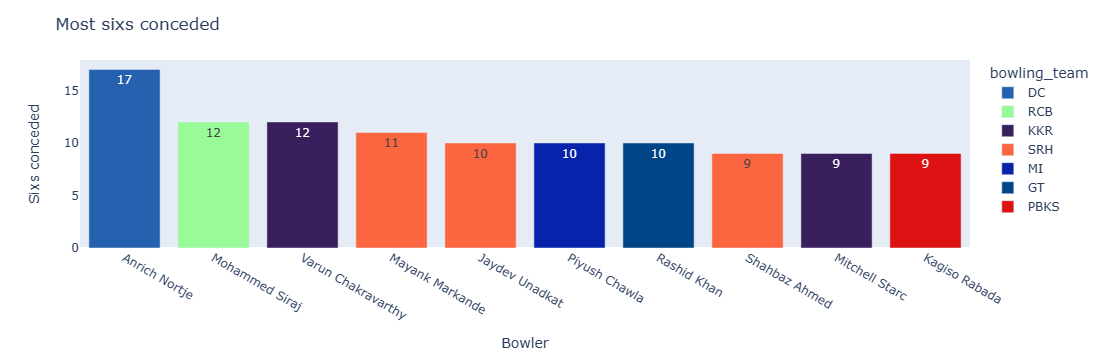

In [49]:
plot_bowling_chart('Most sixs conceded','sixesConceded','Sixs conceded')

### Team Scoring Performance

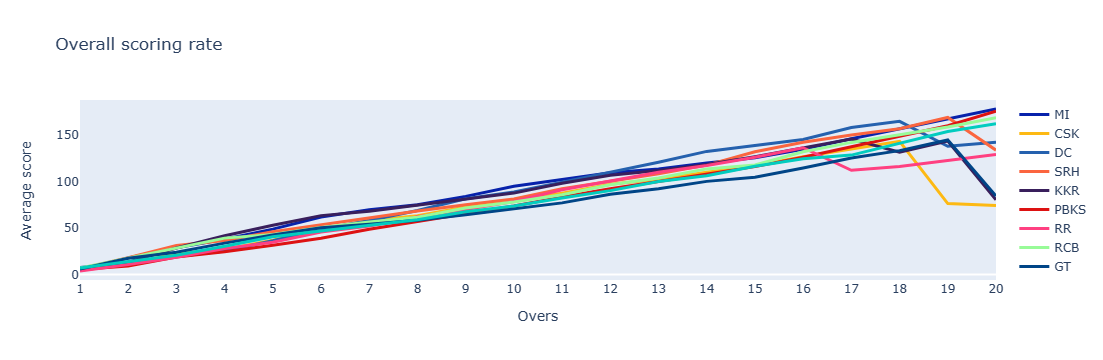

In [50]:
avg_runs = {}
for item in team_colors.keys():
    if 'KIXP' != item:
        avg_runs[item] = np.zeros(20)
        
for match in details_24['match_id'].unique():
    df = details_24.loc[details_24['match_id'] == match]
    innings = list(df.groupby('current_innings')['current_innings'].unique())
    for inning in innings:
#        print(inning)
        df_inning = df.loc[df['current_innings'] == inning[0]].groupby(['over'])['runs'].sum().reset_index()
        df_inning['cumsum'] = df_inning['runs'].cumsum()
        df_inning['current_innings'] = inning[0]
        over = df_inning['over']
        team = inning[0]
        runs = np.array(df_inning['cumsum'])
        runs.resize(20)
        avg_runs[team] = np.median([avg_runs[team],runs], axis=0)
fig = go.Figure()
over = np.arange(1,21)
for item in avg_runs.keys():
    fig.add_trace(go.Scatter(x=over, 
                         y=avg_runs[item],
                         mode='lines',
                         name = item,
                         line=dict(color=team_colors[item], width = 3)
                        )
             )
fig.update_layout(xaxis=dict(tickmode = 'array',
        tickvals = np.arange(1,21), title='Overs',showgrid=False),yaxis=dict(title='Average score',showgrid=False), 
                  title = 'Overall scoring rate')    
fig.show()
    

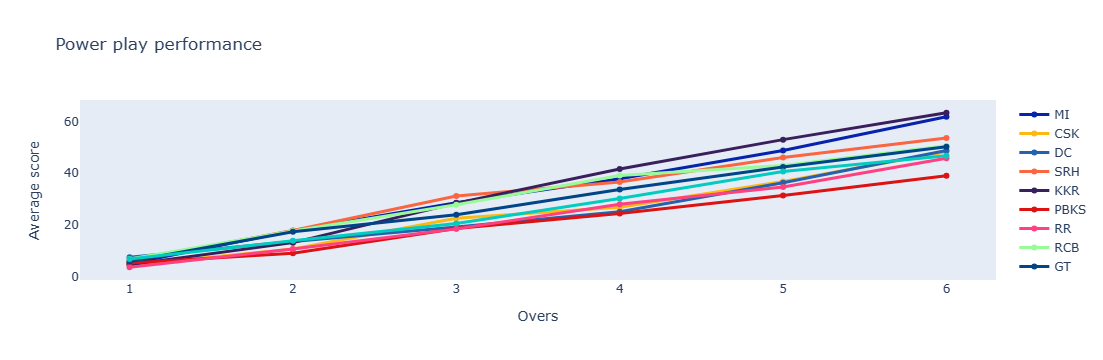

In [51]:
avg_runs = {}
for item in team_colors.keys():
    if 'KIXP' != item:
        avg_runs[item] = np.zeros(6)
        
for match in details_24['match_id'].unique():
    df = details_24.loc[details_24['match_id'] == match]
    innings = list(df.groupby('current_innings')['current_innings'].unique())
    for inning in innings:
        df_inning = df.loc[(df['current_innings'] == inning[0]) & (df['over'] <=6 )].groupby(['over'])['runs'].sum().reset_index()
        df_inning['cumsum'] = df_inning['runs'].cumsum()
        df_inning['current_innings'] = inning[0]
        over = df_inning['over']
        team = inning[0]
        runs = np.array(df_inning['cumsum'])
        runs.resize(6)
        avg_runs[team] = np.median([avg_runs[team],runs], axis=0)
        
fig = go.Figure()
over = np.arange(1,21)
for item in avg_runs.keys():
    fig.add_trace(go.Scatter(x=over, 
                         y=avg_runs[item],
                         mode='lines+markers',
                         name = item,
                         line=dict(color=team_colors[item], width = 3)
                        )
             )
fig.update_layout(xaxis=dict(tickmode = 'array',
        tickvals = np.arange(1,21), title='Overs',showgrid=False),yaxis=dict(title='Average score',showgrid=False,zeroline=False), 
                  title = 'Power play performance',
                 #plot_bgcolor="#8f8b8b"
                 )    
fig.show()

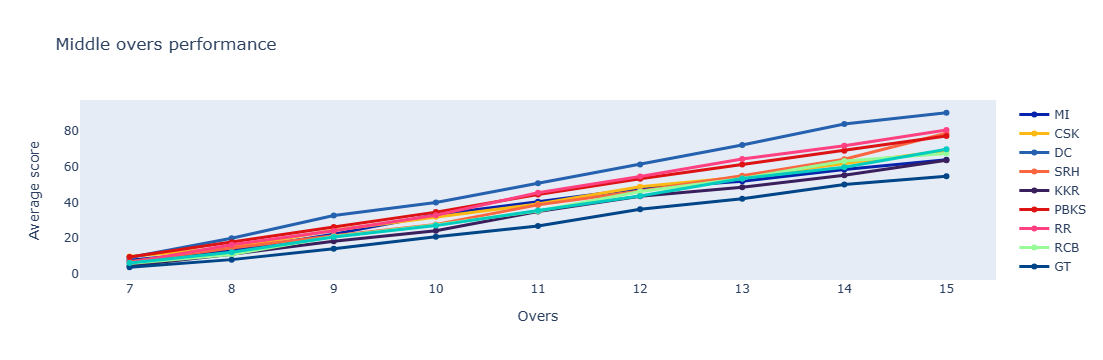

In [52]:
avg_runs = {}
for item in team_colors.keys():
    if 'KIXP' != item:
        avg_runs[item] = np.zeros(9)
        
for match in details_24['match_id'].unique():
    df = details_24.loc[details_24['match_id'] == match]
    innings = list(df.groupby('current_innings')['current_innings'].unique())
    for inning in innings:
        df_inning = df.loc[(df['current_innings'] == inning[0]) & (df['over'] >6 ) & (df['over'] <=15 )].groupby(['over'])['runs'].sum().reset_index()
        df_inning['cumsum'] = df_inning['runs'].cumsum()
        df_inning['current_innings'] = inning[0]
        over = df_inning['over']
        team = inning[0]
        runs = np.array(df_inning['cumsum'])
        runs.resize(9)
        avg_runs[team] = np.median([avg_runs[team],runs], axis=0)

fig = go.Figure()
over = np.arange(7,16)
for item in avg_runs.keys():
    fig.add_trace(go.Scatter(x=over, 
                         y=avg_runs[item],
                         mode='lines+markers',
                         name = item,
                         line=dict(color=team_colors[item], width = 3)
                        )
             )
fig.update_layout(xaxis=dict(tickmode = 'array',
        tickvals = np.arange(1,21), title='Overs',showgrid=False),yaxis=dict(title='Average score',showgrid=False,zeroline=False), 
                  title = 'Middle overs performance',
                 #plot_bgcolor="#8f8b8b"
                 )    
fig.show()

In [53]:
def plot_team_batting_chart(title, column, label):
    df = batting_24.groupby(['current_innings'])[column].sum().reset_index()
    df = df.sort_values(column, ascending=False)
    fig = px.bar(df, x='current_innings', y=column,
             hover_data=['current_innings', column], color='current_innings',
             labels={column: label},
             color_discrete_map=team_colors,
             text=column)
    fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': df['current_innings'],'title' : 'Team','showgrid' :False},
                      yaxis=dict(title='Total',showgrid=False,zeroline=False),
                     title = title)
    fig.show()

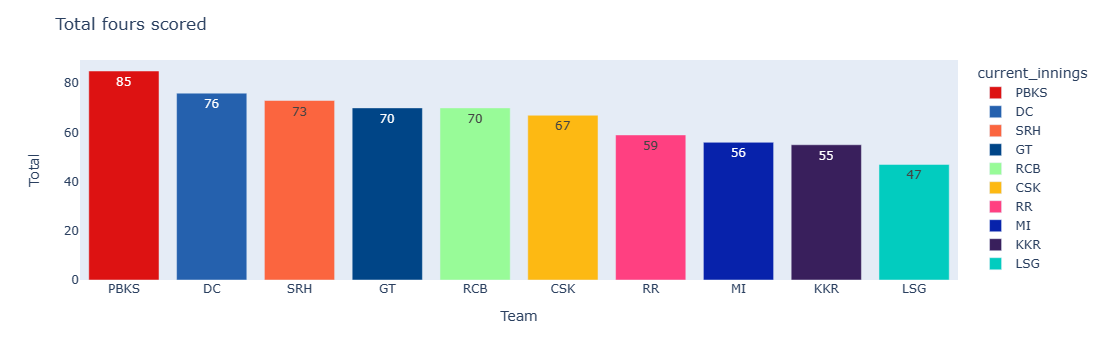

In [54]:
plot_team_batting_chart('Total fours scored', 'fours','Total fours')

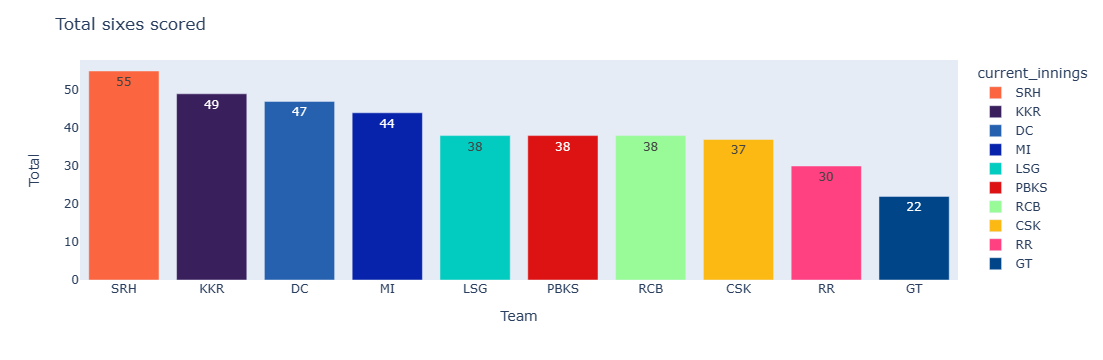

In [55]:
plot_team_batting_chart('Total sixes scored', 'sixes','Total sixes')

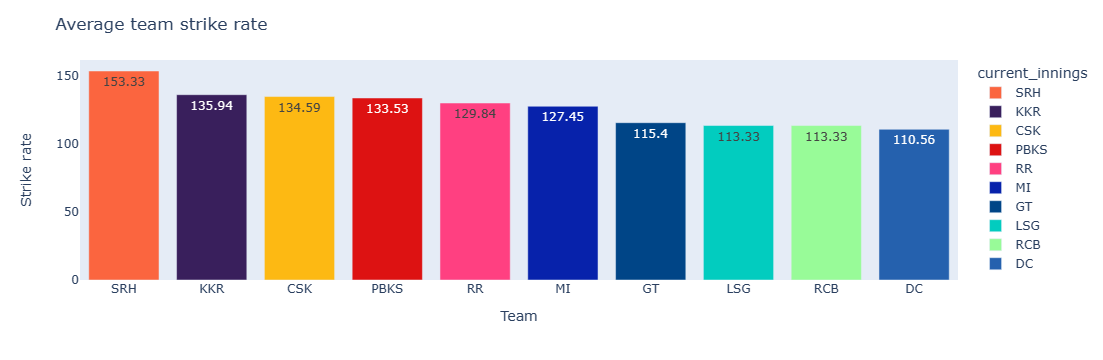

In [56]:
label = 'Average team strike rate'
title = 'Average team strike rate'
column = 'strikeRate'
df = batting_24.groupby('current_innings')['strikeRate'].mean().reset_index().round(2)
df = df.sort_values(column, ascending=False)
fig = px.bar(df, x='current_innings', y=column,
         hover_data=['current_innings', column], color='current_innings',
         labels={column: label},
         color_discrete_map=team_colors,
         text=column)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': df['current_innings'],'title' : 'Team','showgrid' :False},
                  yaxis=dict(title='Strike rate',showgrid=False,zeroline=False),
                 title = title)
fig.show()

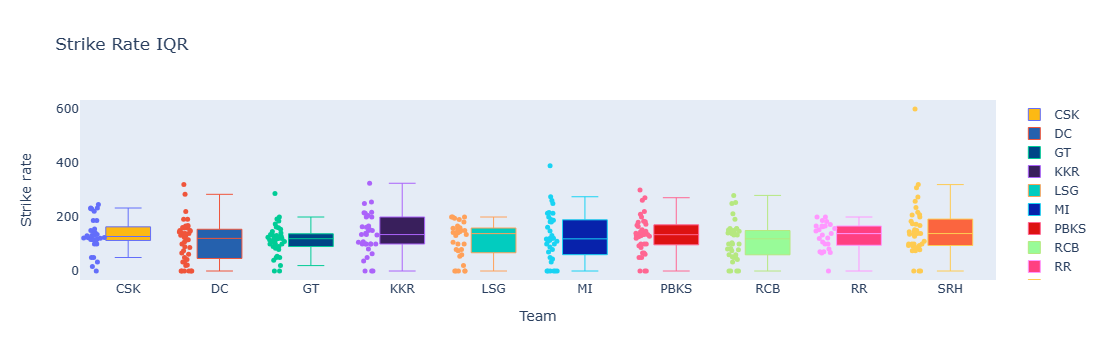

In [57]:
fig = go.Figure()
for team in sorted(list(batting_24['current_innings'].unique())):
    df = batting_24.loc[batting_24['current_innings'] == team][['current_innings','fullName','strikeRate']].reset_index(drop=True)
    fig.add_trace(go.Box(y=df['strikeRate'], 
                         name=team, 
                         boxpoints='all',
                         jitter=0.5,
                         whiskerwidth=0.6,
                         #text=df['fullName'],
                         #hoverinfo='text',
                         fillcolor=team_colors[team],
                         marker_size=5,
                         line_width=1))

    fig.update_layout(xaxis={'title' : 'Team','showgrid' :False},
                  yaxis=dict(title='Strike rate',showgrid=False,zeroline=False),
                 title = 'Strike Rate IQR')    
fig.show()

In [58]:
def plot_team_bowling_chart(df, label, title, column):
    fig = px.bar(df, x='bowling_team', y=column,
             hover_data=['bowling_team', column], color='bowling_team',
             labels={column: label},
             color_discrete_map=team_colors,
             text=column)
    fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': df['bowling_team'],'title' : 'Team','showgrid' :False},
                      yaxis=dict(title=label,showgrid=False,zeroline=False),
                     title = title)
    fig.show()

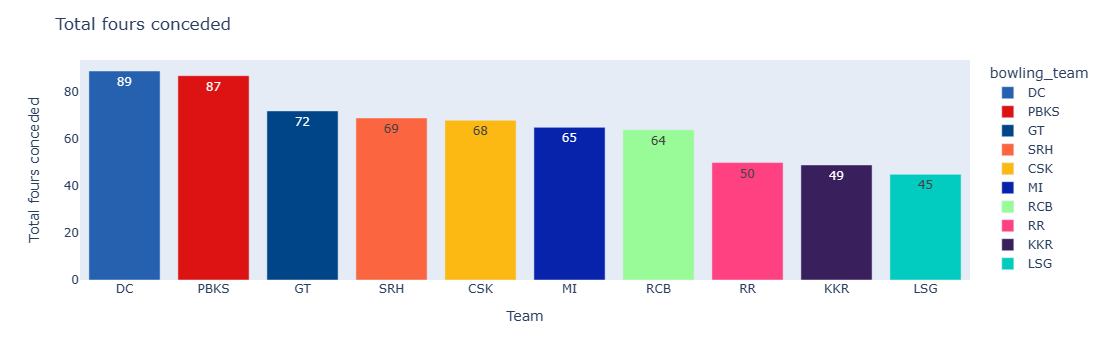

In [59]:
column = 'foursConceded'
df = bowling_24.groupby('bowling_team')[column].sum().reset_index()
df = df.sort_values(column, ascending=False)
plot_team_bowling_chart(df, 'Total fours conceded', 'Total fours conceded', 'foursConceded')

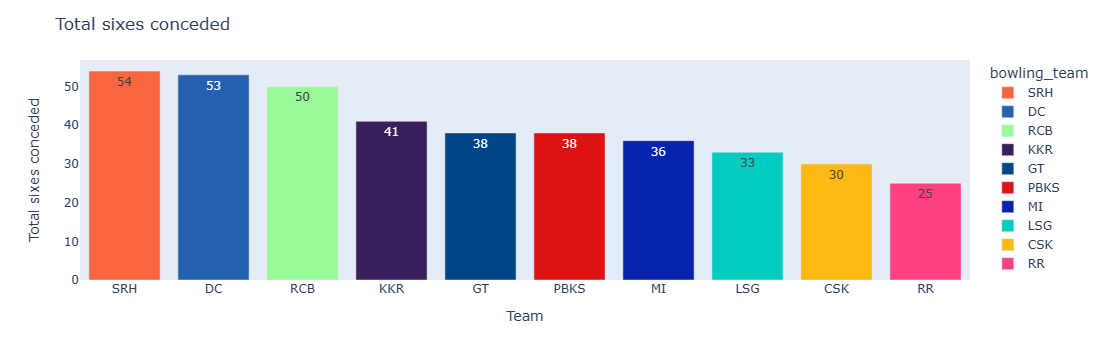

In [60]:
column = 'sixesConceded'
df = bowling_24.groupby('bowling_team')[column].sum().reset_index()
df = df.sort_values(column, ascending=False)
plot_team_bowling_chart(df, 'Total sixes conceded', 'Total sixes conceded', column)

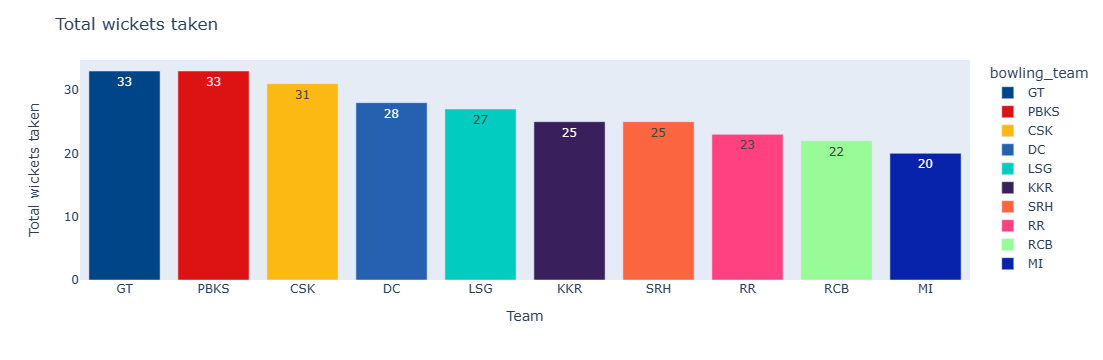

In [61]:
column = 'wickets'
df = bowling_24.groupby('bowling_team')[column].sum().reset_index()
df = df.sort_values(column, ascending=False)
plot_team_bowling_chart(df, 'Total wickets taken', 'Total wickets taken', column)

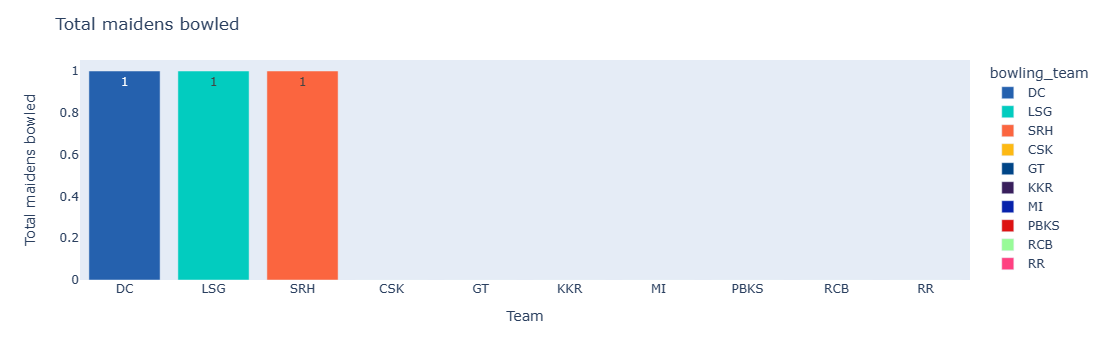

In [62]:
column = 'maidens'
df = bowling_24.groupby('bowling_team')[column].sum().reset_index()
df = df.sort_values(column, ascending=False)
#No maidens so far!
plot_team_bowling_chart(df, 'Total maidens bowled', 'Total maidens bowled', column)

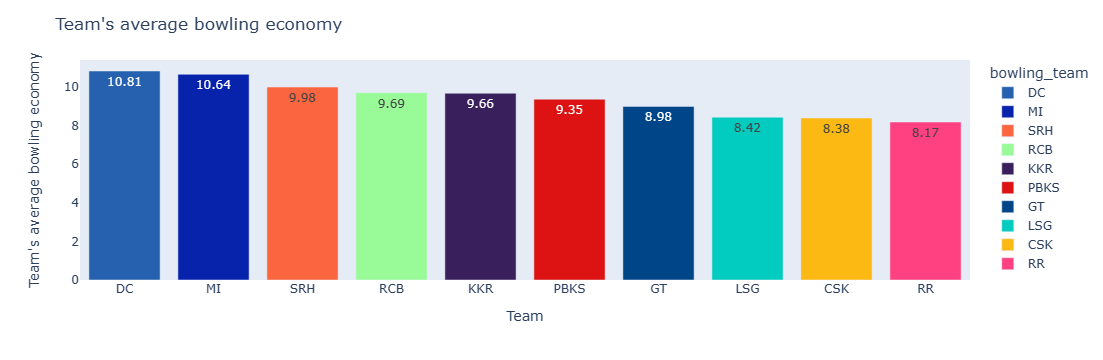

In [63]:
column = 'economyRate'
df = bowling_24.groupby('bowling_team')[column].mean().round(2).reset_index()
df = df.sort_values(column, ascending=False)
plot_team_bowling_chart(df, 'Team\'s average bowling economy', 'Team\'s average bowling economy', column)

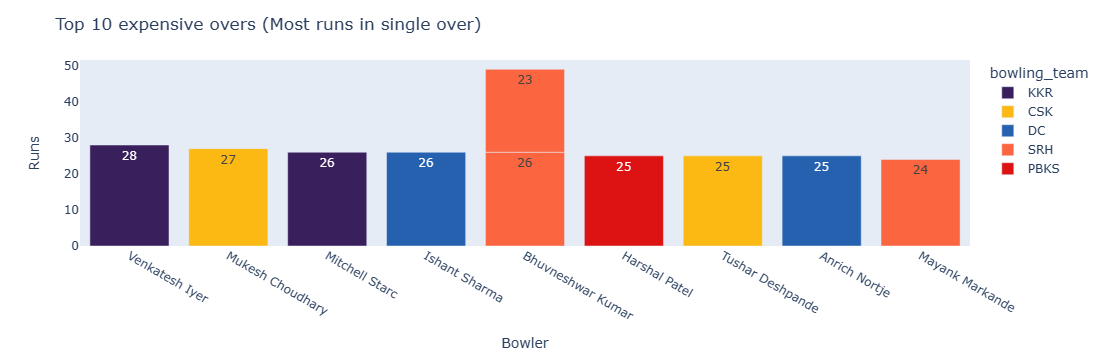

In [64]:
def populate_bowling_team(row):
    team1 = row['match_name'].split("v")[0].strip()
    team2 = row['match_name'].split("v")[1].strip()
    if team1 == row['current_innings']:
        return team2
    else:
        return team1
    
expensive_over = details_24.groupby(['match_name','current_innings','bowler1_name','over'])['runs'].sum().reset_index().sort_values(by='runs',ascending=False).reset_index(drop=True).head(10)
expensive_over['bowling_team'] = expensive_over.apply(lambda row: populate_bowling_team(row), axis=1)

fig = px.bar(expensive_over, x='bowler1_name', y='runs',
    hover_data=['match_name', 'current_innings','over','runs'], color='bowling_team',
             labels={column: 'runs'},
             color_discrete_map=team_colors,
             text='runs')
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': expensive_over['bowler1_name'],'title' : 'Bowler','showgrid' :False},
                      yaxis=dict(title='Runs',showgrid=False,zeroline=False),
                     title = 'Top 10 expensive overs (Most runs in single over)')
fig.show()

In [65]:
matchup_df = details_24.groupby(['batsman1_name','bowler1_name', 'current_innings', 'match_name']).agg({'runs': ['sum'], 'ball':'count'}).reset_index().sort_values(by=("runs","sum"),ascending=False).reset_index(drop=True)
matchup_df.columns = ["".join(a) for a in matchup_df.columns.to_flat_index()]
matchup_df['bowling_team'] = matchup_df.apply(lambda row: populate_bowling_team(row), axis=1)
matchup_df[['match_name','batsman1_name','current_innings','bowler1_name','bowling_team','runssum','ballcount']].head(20)

match_name       batsman1_name current_innings        bowler1_name  \
0     RR v RCB         Virat Kohli             RCB          Avesh Khan   
1   PBKS v SRH  Nitish Kumar Reddy             SRH       Harpreet Brar   
2    KKR v SRH       Andre Russell             KKR   Bhuvneshwar Kumar   
3    RCB v KKR         Virat Kohli             RCB      Mitchell Starc   
4    RCB v KKR        Sunil Narine             KKR          Yash Dayal   
5    PBKS v DC       Abishek Porel              DC       Harshal Patel   
6    KKR v SRH           Phil Salt             KKR        Marco Jansen   
7     RR v LSG        Sanju Samson              RR         Yash Thakur   
8      MI v RR         Riyan Parag              RR      Gerald Coetzee   
9     DC v CSK        David Warner              DC       Deepak Chahar   
10   PBKS v DC          Sam Curran            PBKS      Mitchell Marsh   
11   RCB v LSG     Quinton de Kock             LSG      Mohammed Siraj   
12   KKR v SRH    Heinrich Klaasen             SRH  Varun Chakravarthy   
13  LSG v PBKS       Krunal Pandya             LSG       Harshal Patel   
14    DC v KKR      Tristan Stubbs              DC  Varun Chakravarthy   
15     MI v DC      Tristan Stubbs              DC    Romario Shepherd   
16    DC v KKR        Rishabh Pant              DC      Venkatesh Iyer   
17    SRH v MI     Abhishek Sharma             SRH       Piyush Chawla   
18   SRH v CSK     Abhishek Sharma             SRH    Mukesh Choudhary   
19    SRH v MI        Ishan Kishan              MI   Bhuvneshwar Kumar   

   bowling_team  runssum  ballcount  
0            RR       39         17  
1          PBKS       38         16  
2           SRH       36         10  
3           KKR       34         18  
4           RCB       33         10  
5          PBKS       31          9  
6           SRH       31         14  
7           LSG       30         12  
8            MI       30         12  
9           CSK       29         13  
10           DC       29         15  
11          RCB       28         12  
12          KKR       28         11  
13         PBKS       28         15  
14          KKR       28         15  
15           MI       28          8  
16          KKR       28          6  
17           MI       28          8  
18          CSK       27          7  
19          SRH       27          9

In [66]:
runspo = details_24.groupby(['over','batsman1_name'])['runs'].sum().reset_index()
#runspo.groupby(['over',''])['runs']
idx = runspo.groupby(['over'])['runs'].transform(max) == runspo['runs']
batsman_team = batting_24[['fullName','current_innings']]
batsman_team_map = dict(zip(batsman_team['fullName'],batsman_team['current_innings']))
#batsman_team_map
runspo['team'] = runspo['batsman1_name'].apply(lambda batsman: batsman_team_map[batsman])
#runspo[idx]

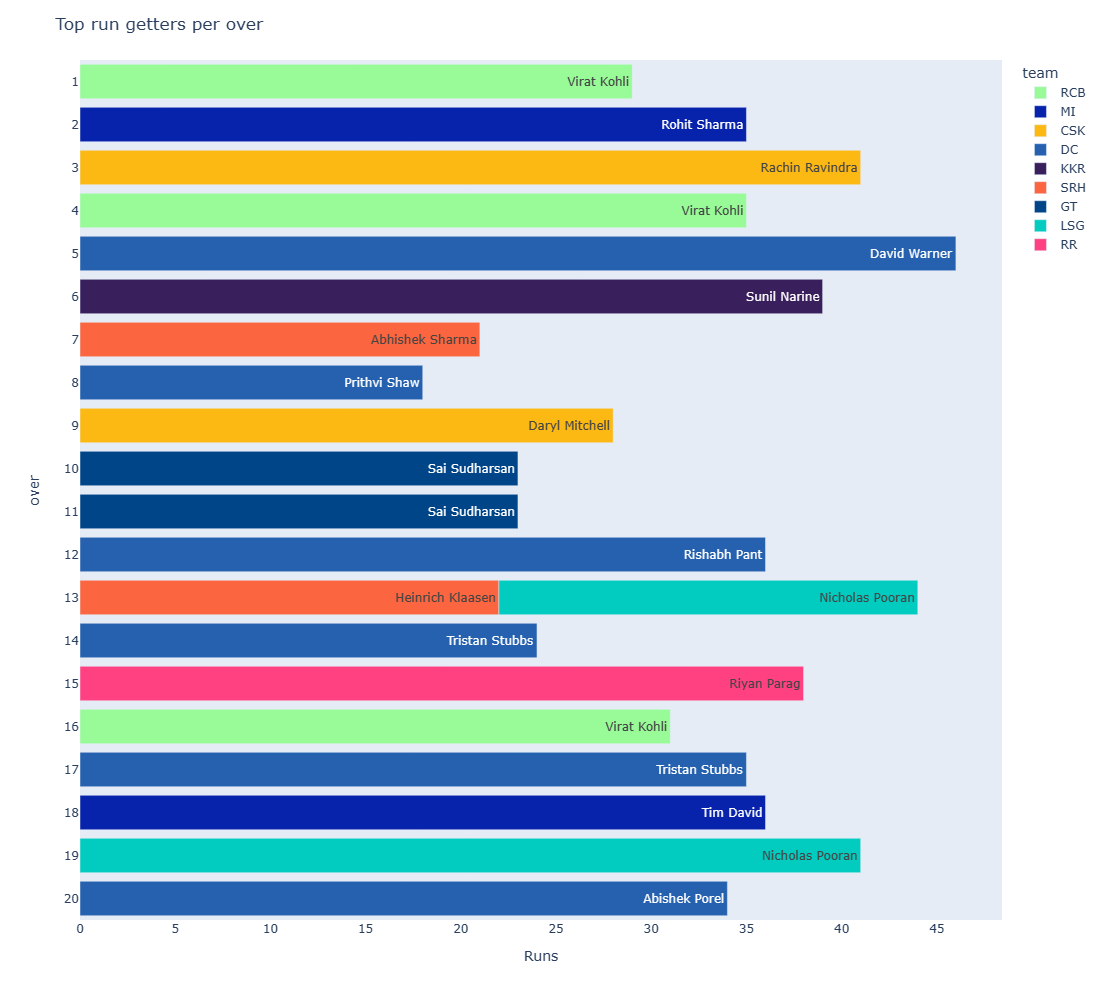

In [67]:
fig = px.bar(runspo[idx], x='runs', y='over',
    hover_data=['batsman1_name', 'team','runs','over'], color='team',
             labels={column: 'batsman1_name'},
             color_discrete_map=team_colors,
             text='batsman1_name',
            orientation='h')
fig.update_layout(yaxis=dict(
        tickmode="array",
        tickvals=np.arange(1, runspo['over'].max()+1),
        tickangle=0,
        autorange = 'reversed'),
                  xaxis=dict(title='Runs',showgrid=False,zeroline=False),
                 title="Top run getters per over", 
                  height=1000)

fig.show()

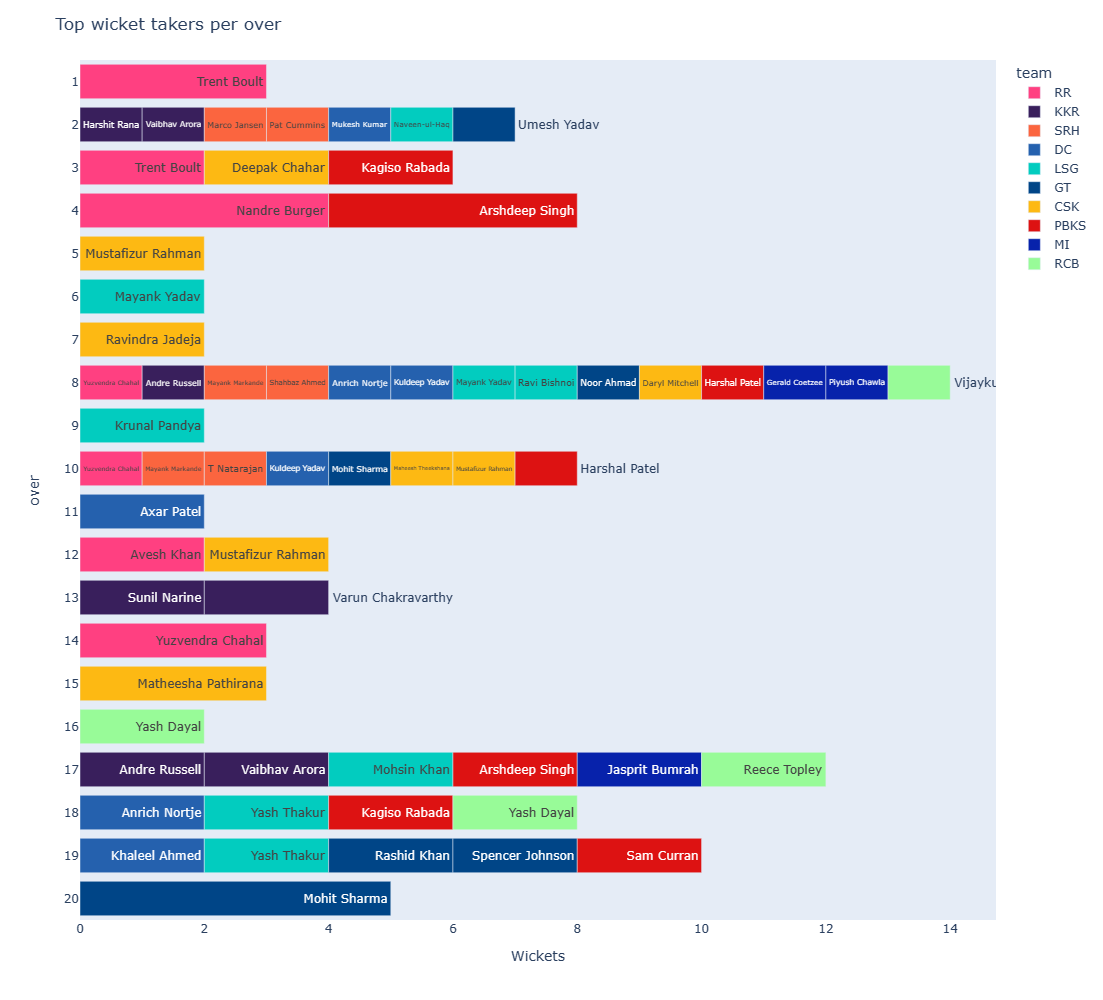

In [68]:
def is_out(wkid):
    '''
    If the wicket id is non zero then that particular delivery is resulted in batsman getting out!
    '''
    if wkid !=0 :
        return 1
    else:
        return 0

#Gather data    
details_24['wicket_id'] = details_24['wicket_id'].fillna(0)
details_24['wicket_id'] = details_24['wicket_id'].astype(int)    
details_24['isOut'] = details_24['wicket_id'].apply(lambda wkid : is_out(wkid))
wicketspo = details_24.groupby(['over','bowler1_name'])['isOut'].sum().reset_index()
wicketspo.rename(columns={'isOut':'wickets'}, inplace=True)
idx = wicketspo.groupby(['over'])['wickets'].transform(max) == wicketspo['wickets']
bowl_team = bowling_24[['fullName','bowling_team']]
batsman_team_map = dict(zip(bowl_team['fullName'],bowl_team['bowling_team']))
wicketspo['team'] = wicketspo['bowler1_name'].apply(lambda bowler: batsman_team_map[bowler])

#Plot
fig = px.bar(wicketspo[idx], x='wickets', y='over',
    hover_data=['bowler1_name', 'team','wickets','over'], color='team',
             labels={column: 'bowler1_name'},
             color_discrete_map=team_colors,
             text='bowler1_name',
            orientation='h')
fig.update_layout(yaxis=dict(
        tickmode="array",
        tickvals=np.arange(1, wicketspo['over'].max()+1),
        tickangle=0,
        autorange = 'reversed'),
                  xaxis=dict(title='Wickets',showgrid=False,zeroline=False),
                 title="Top wicket takers per over", 
                  height=1000)

fig.show()

# Performance Matrix

### 1. Batting Performance

In [69]:
# Define Performance Metrics for Batting
batting_metrics = ['Runs', 'Strike Rate', 'Fours', 'Sixes', '50s']

# Calculate Batting Performance Metrics for each Batsman
batting_performance = {}
for batsman in batting_24['fullName'].unique():
    # Calculate Runs, Strike Rate, Fours, Sixes, and 50s for each batsman
    runs = batting_24.loc[batting_24['fullName'] == batsman, 'runs'].sum()
    balls_faced = batting_24.loc[batting_24['fullName'] == batsman, 'ballsFaced'].sum()
    fours = batting_24.loc[batting_24['fullName'] == batsman, 'fours'].sum()
    sixes = batting_24.loc[batting_24['fullName'] == batsman, 'sixes'].sum()
    fifties = len(batting_24.loc[(batting_24['fullName'] == batsman) & (batting_24['runs'] >= 50)])
    strike_rate = (runs / balls_faced) * 100 if balls_faced > 0 else 0
    
    batting_performance[batsman] = {
        'Runs': runs,
        'Strike Rate': strike_rate,
        'Fours': fours,
        'Sixes': sixes,
        '50s': fifties
    }


In [70]:
# Create Batting Performance Matrix
batting_matrix = np.array([[batting_performance[player][metric] for metric in batting_metrics] for player in batting_performance])

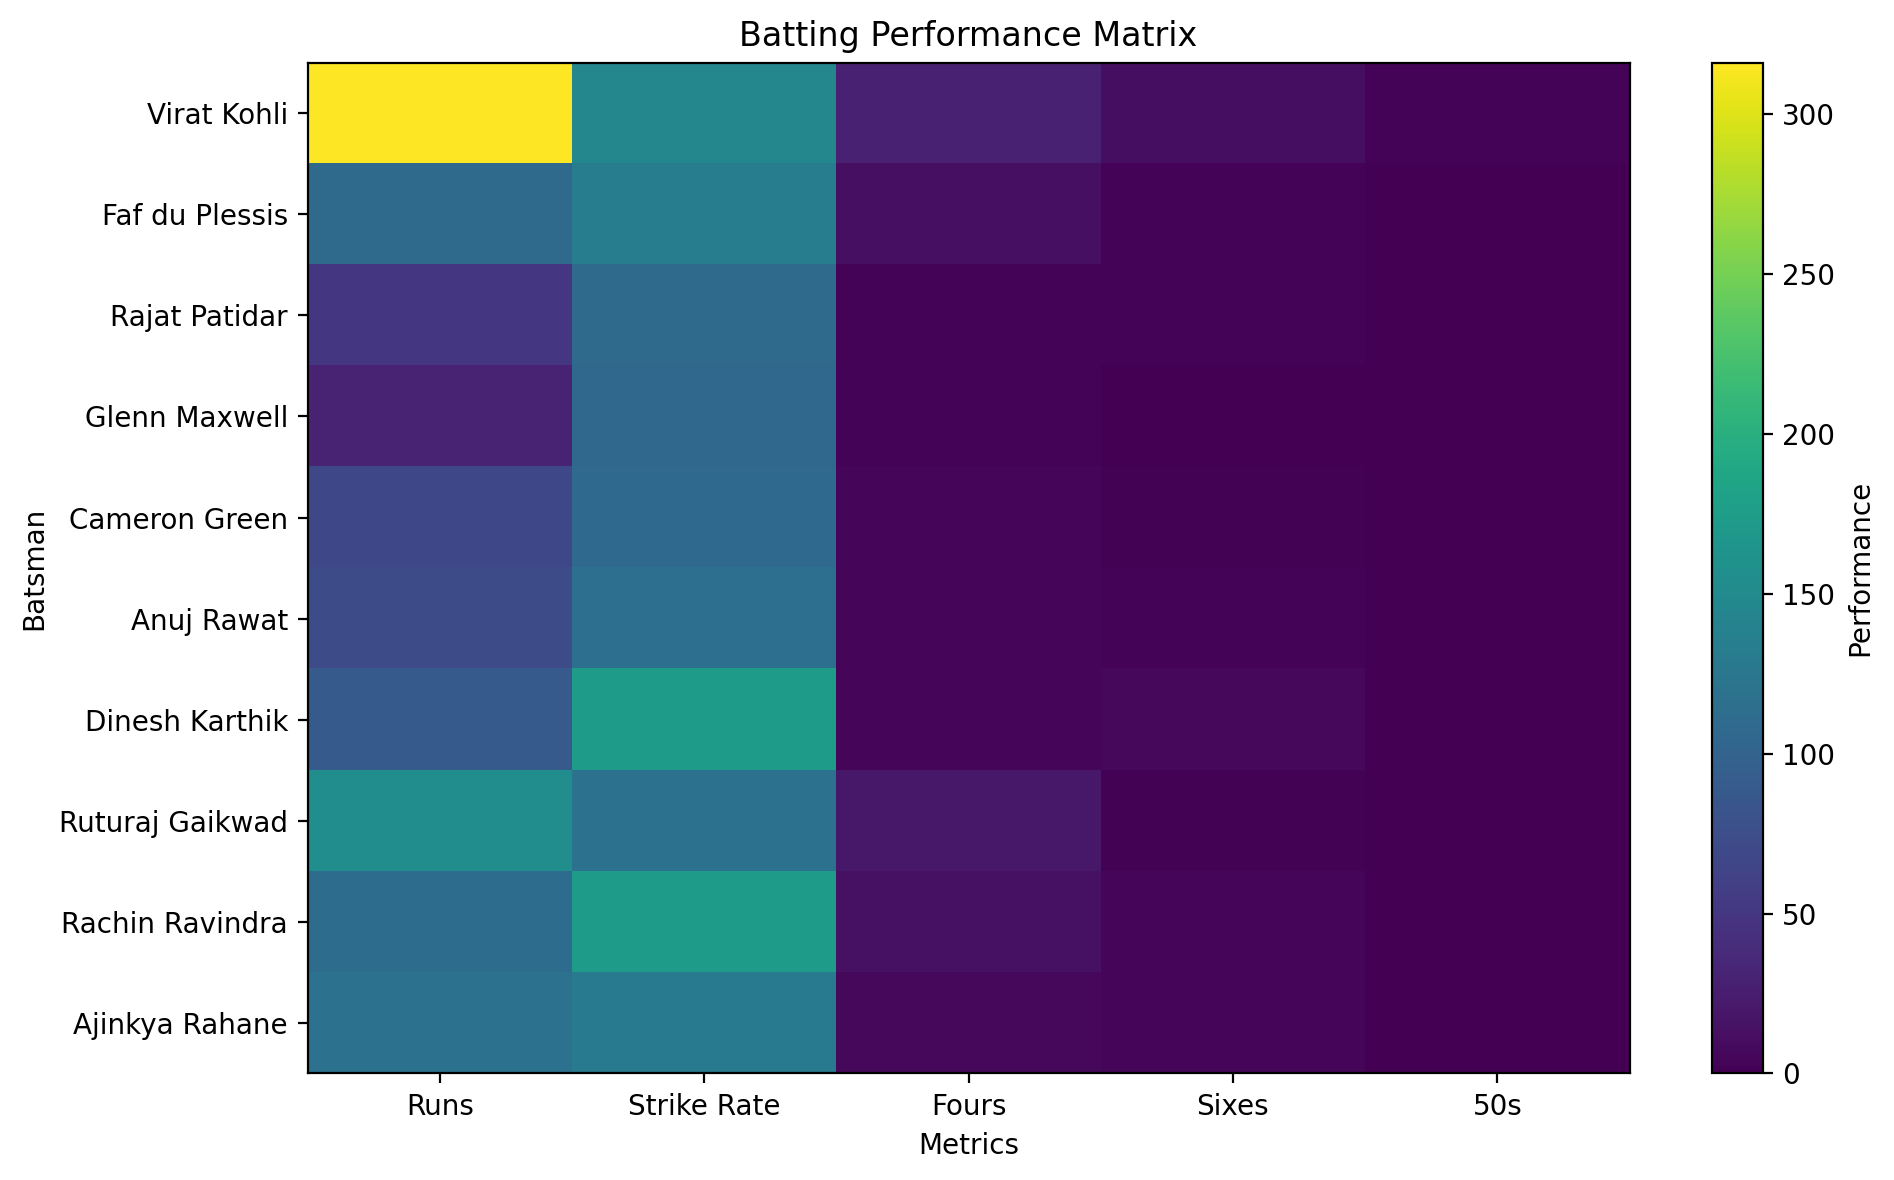

In [71]:
# Select a subset of batsmen to include in the visualization
selected_batsmen = list(batting_performance.keys())[:10]  # Adjust the number as needed

# Visualize the Batting Performance Matrix for selected batsmen
plt.figure(figsize=(10, 6))
plt.imshow(batting_matrix[:10, :], cmap='viridis', aspect='auto')  # Display only the first 10 batsmen
plt.colorbar(label='Performance')
plt.title('Batting Performance Matrix')
plt.xlabel('Metrics')
plt.ylabel('Batsman')
plt.xticks(ticks=np.arange(len(batting_metrics)), labels=batting_metrics)
plt.yticks(ticks=np.arange(len(selected_batsmen)), labels=selected_batsmen)  # Display only selected batsmen
plt.tight_layout()
plt.show()


### 2. Bowling Performance

In [72]:
# Define Performance Metrics for Bowling
bowling_metrics = ['Wickets', 'Economy Rate', 'Dot Balls', 'Power Play Overs', 'Middle Overs', 'Death Overs']

# Calculate Bowling Performance Metrics for each Bowler
bowling_performance = {}
for bowler in bowling_24['fullName'].unique():
    # Filter data for the current bowler
    bowler_data = bowling_24[bowling_24['fullName'] == bowler]
    
    # Calculate Wickets, Economy Rate, Dot Balls, Power Play Overs, Middle Overs, and Death Overs for each bowler
    wickets = bowler_data['wickets'].sum()
    balls_bowled = bowler_data['overs'].sum() * 6
    conceded = bowler_data['conceded'].sum()
    dot_balls = bowler_data['dots'].sum()
    power_play_overs = bowler_data.loc[bowler_data['overs'] <= 6, 'overs'].count()
    middle_overs = bowler_data.loc[(bowler_data['overs'] > 6) & (bowler_data['overs'] <= 15), 'overs'].count()
    death_overs = bowler_data.loc[bowler_data['overs'] > 15, 'overs'].count()
    
    economy_rate = (conceded / balls_bowled) * 6 if balls_bowled > 0 else 0
    
    bowling_performance[bowler] = {
        'Wickets': wickets,
        'Economy Rate': economy_rate,
        'Dot Balls': dot_balls,
        'Power Play Overs': power_play_overs,
        'Middle Overs': middle_overs,
        'Death Overs': death_overs
    }


In [73]:
# Create Bowling Performance Matrix
bowling_matrix = np.array([[bowling_performance[player][metric] for metric in bowling_metrics] for player in bowling_performance])

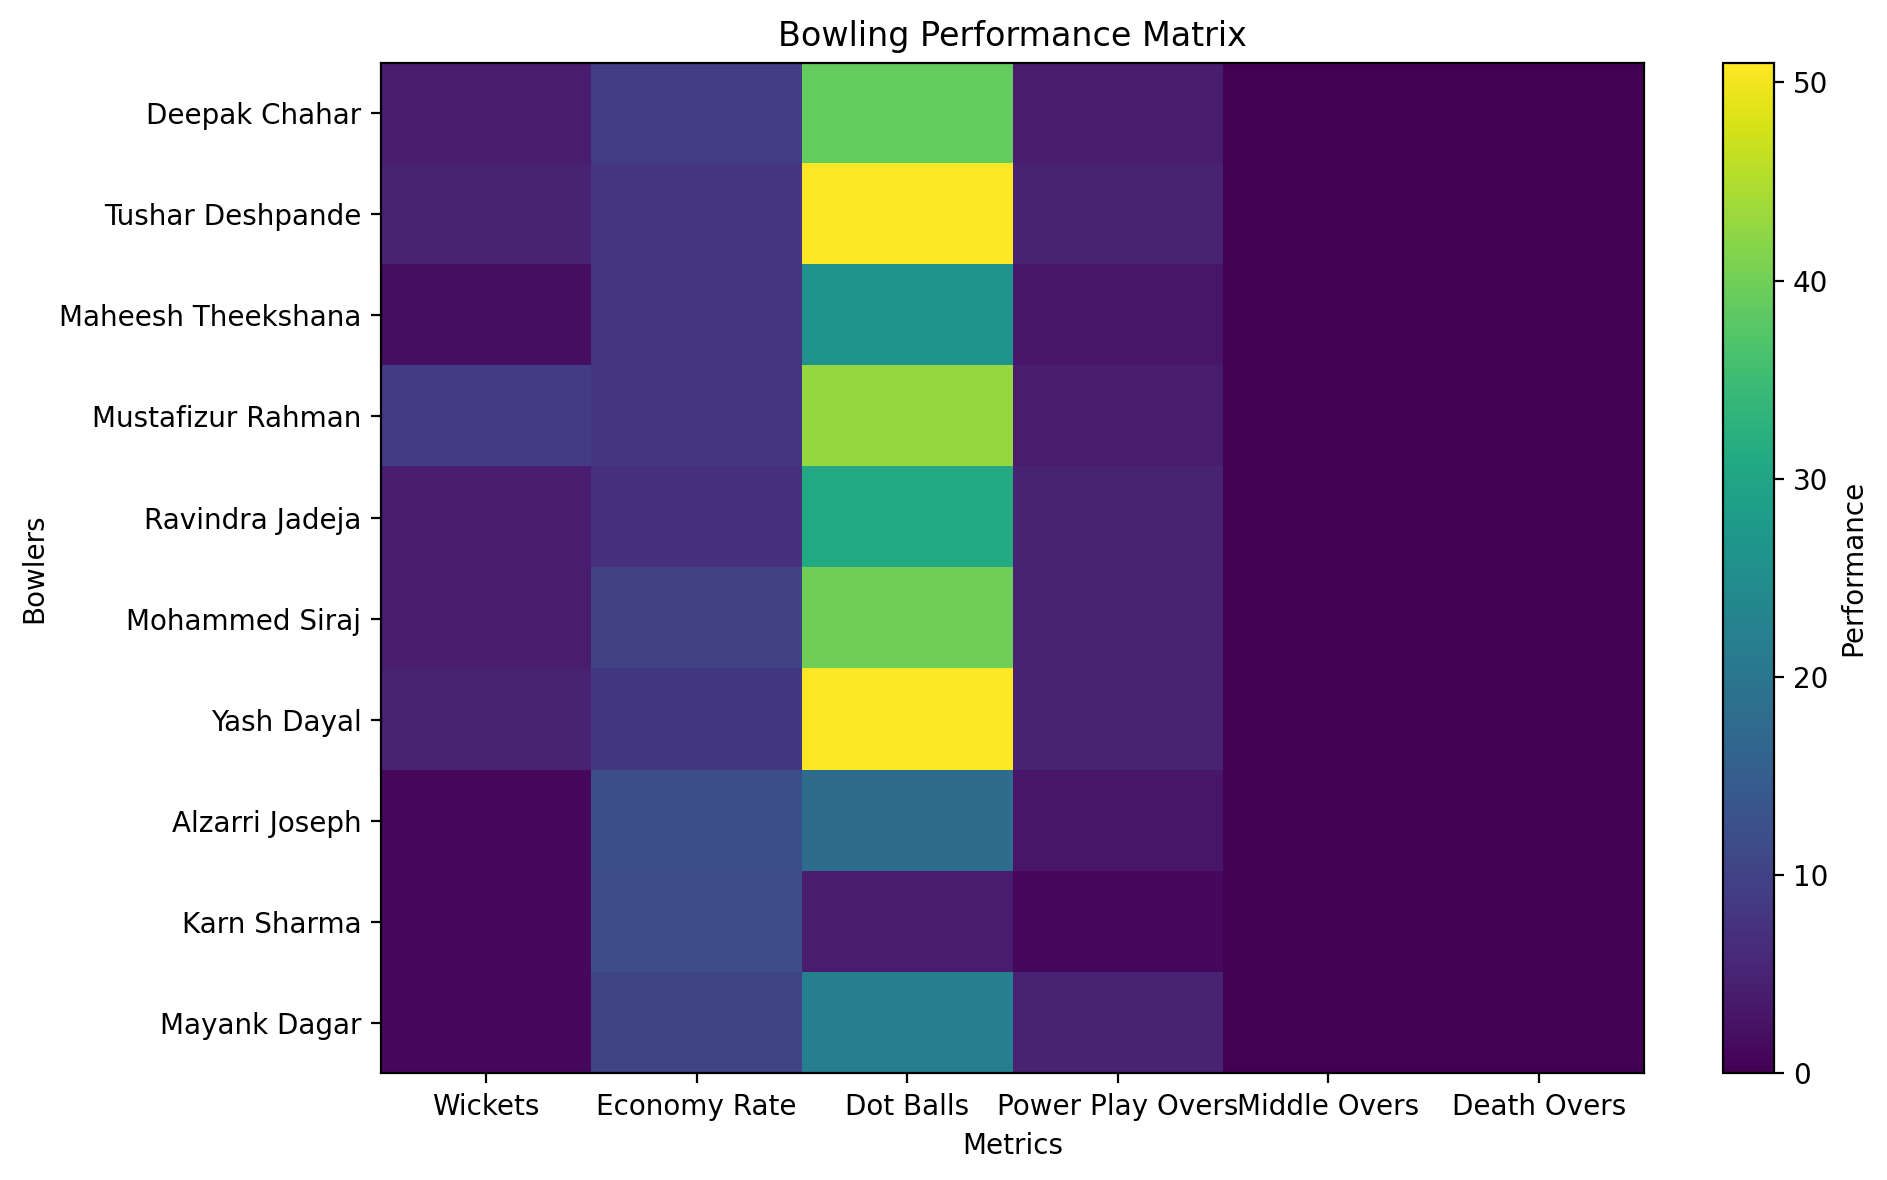

In [74]:
# Select a subset of bowlers to include in the visualization
selected_bowlers = list(bowling_performance.keys())[:10]  # Adjust the number as needed

# Visualize the Bowling Performance Matrix for selected bowlers
plt.figure(figsize=(10, 6))
plt.imshow(bowling_matrix[:10, :], cmap='viridis', aspect='auto')  # Display only the first 10 bowlers
plt.colorbar(label='Performance')
plt.title('Bowling Performance Matrix')
plt.xlabel('Metrics')
plt.ylabel('Bowlers')
plt.xticks(ticks=np.arange(len(bowling_metrics)), labels=bowling_metrics)
plt.yticks(ticks=np.arange(len(selected_bowlers)), labels=selected_bowlers)  # Display only selected bowlers
plt.tight_layout()
plt.show()

